4
2
100 0.0005


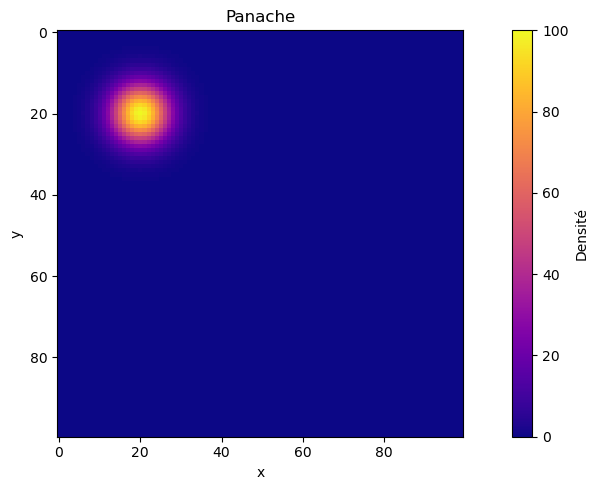

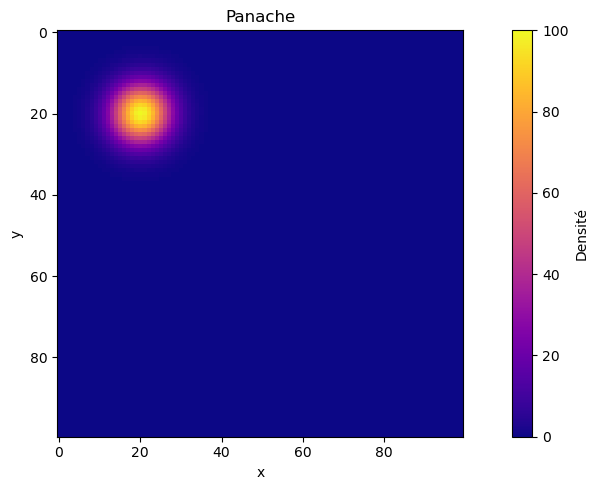

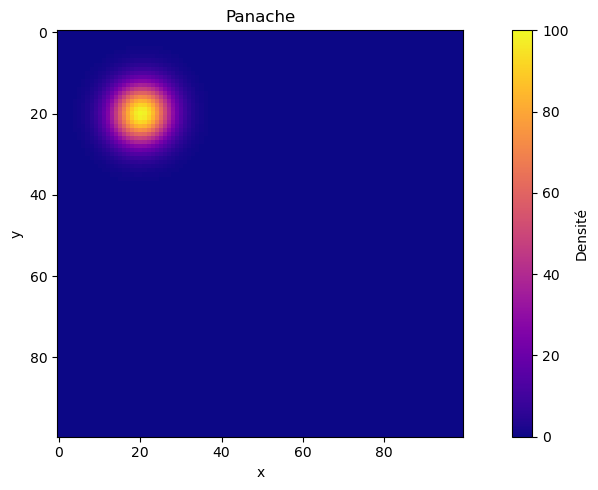

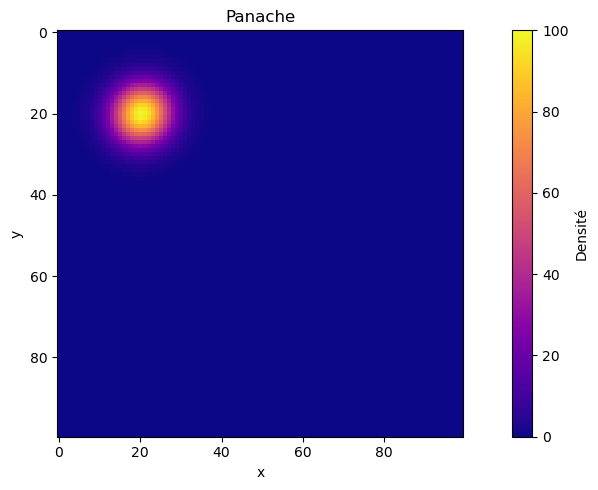

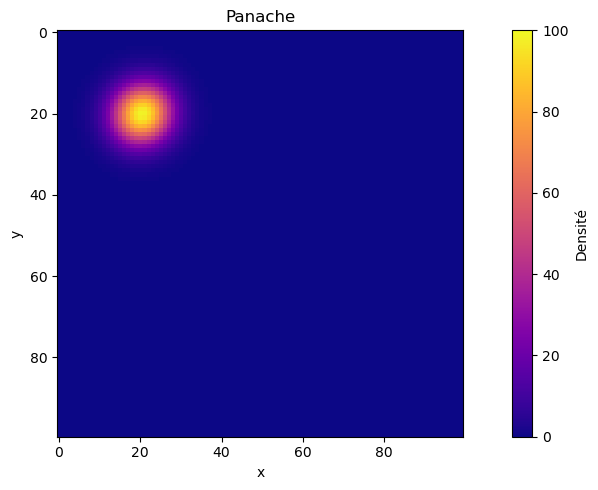

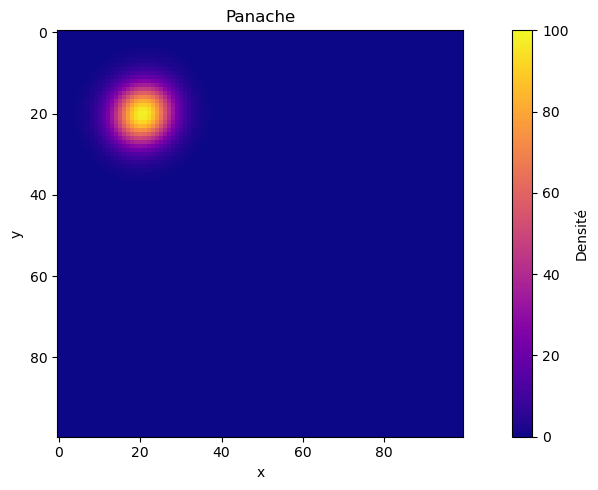

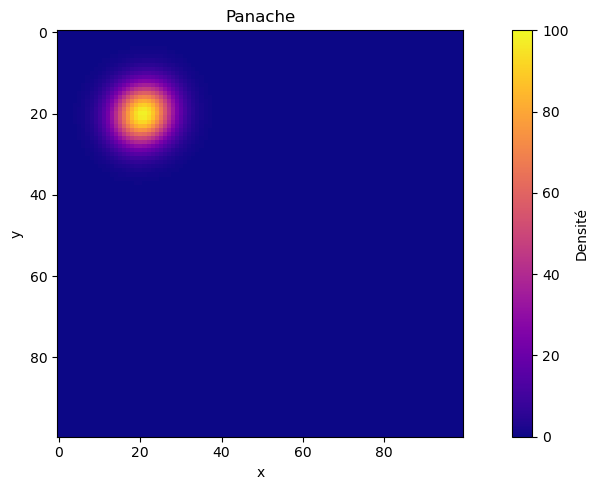

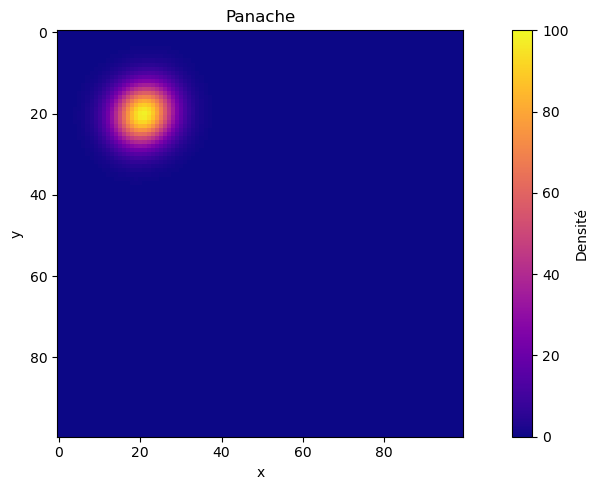

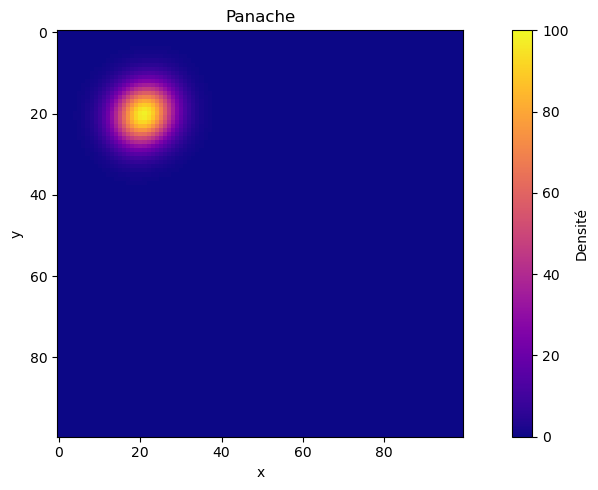

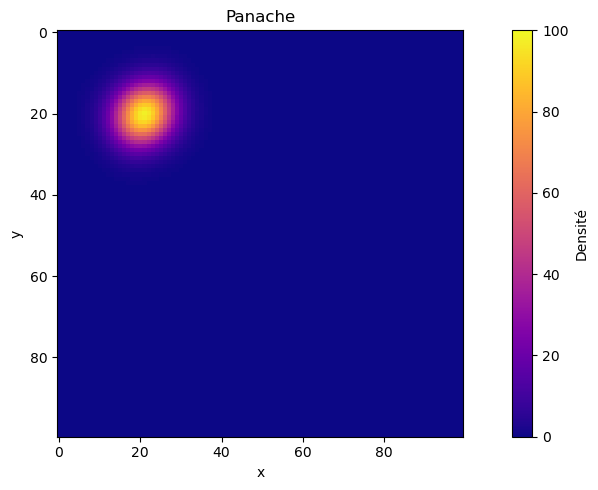

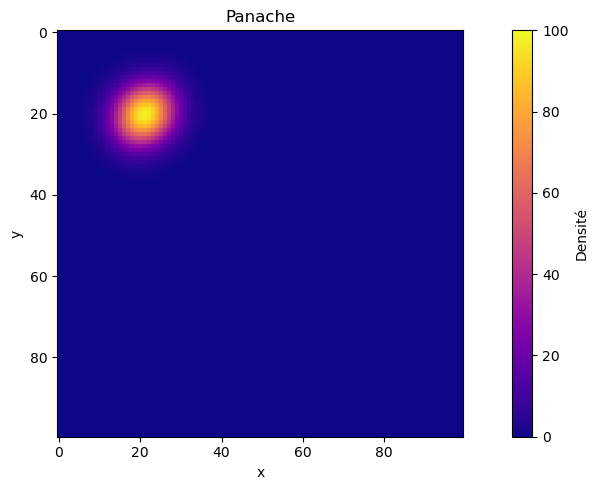

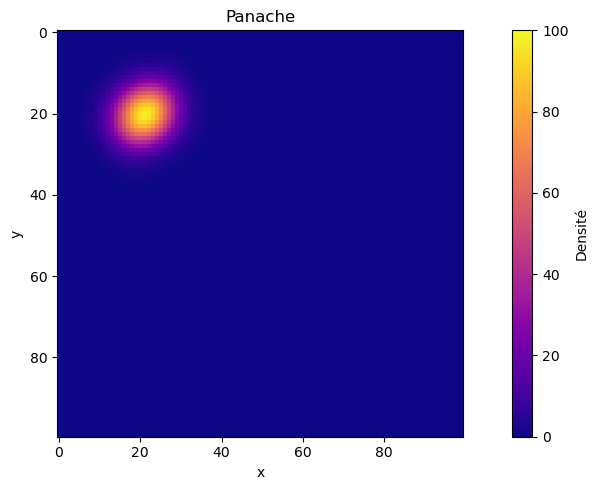

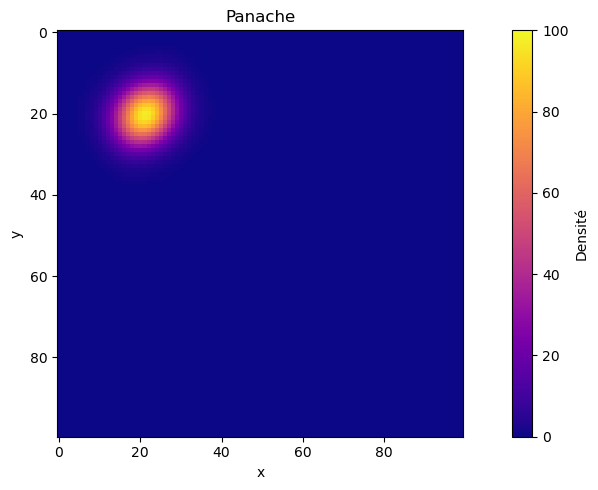

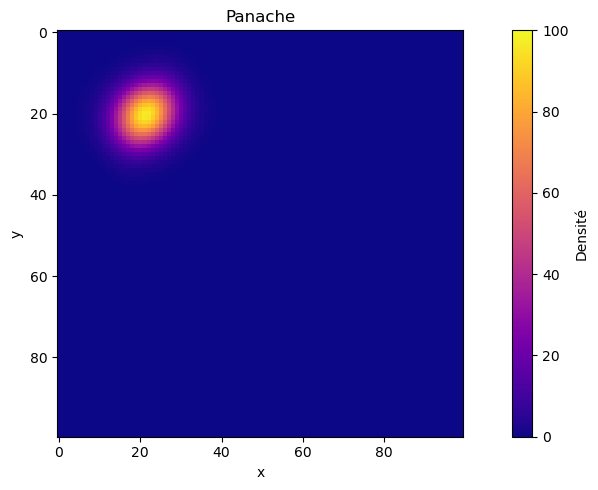

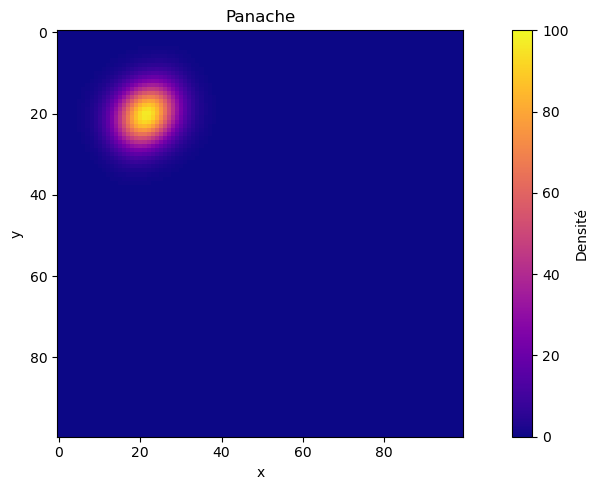

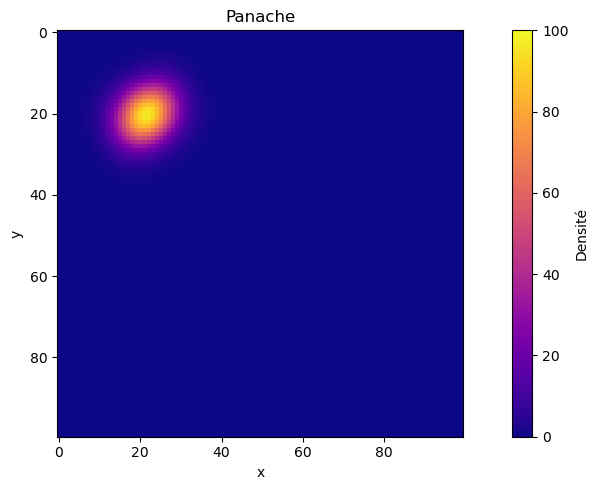

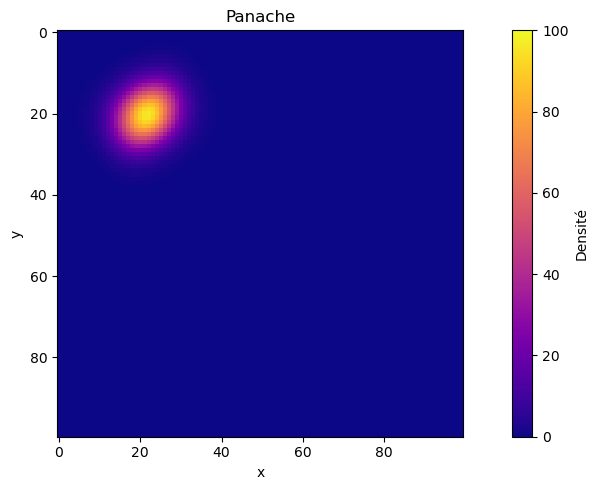

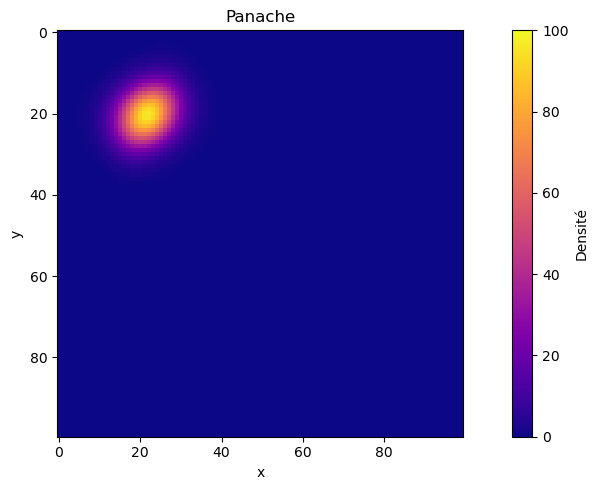

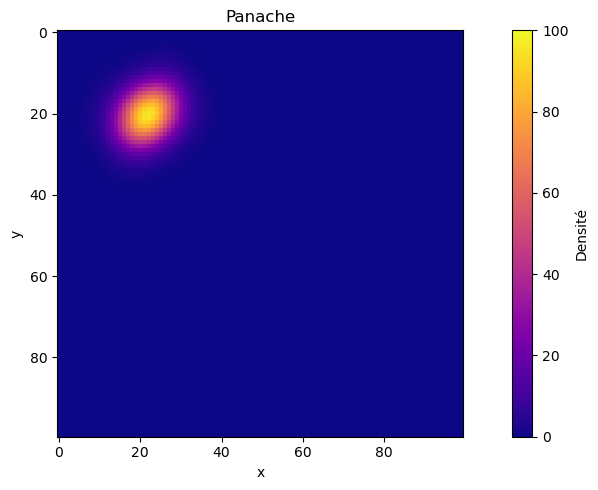

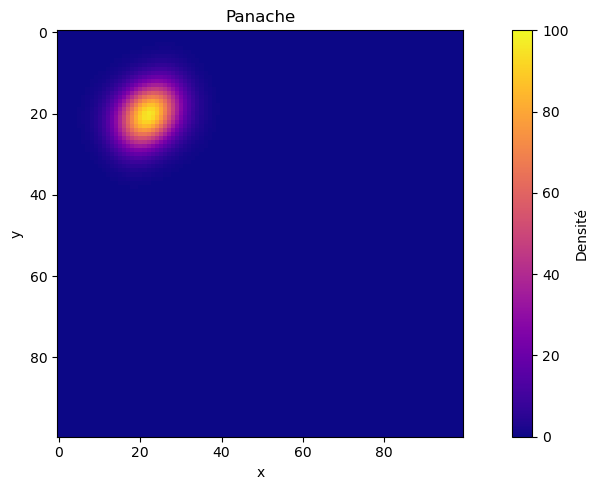

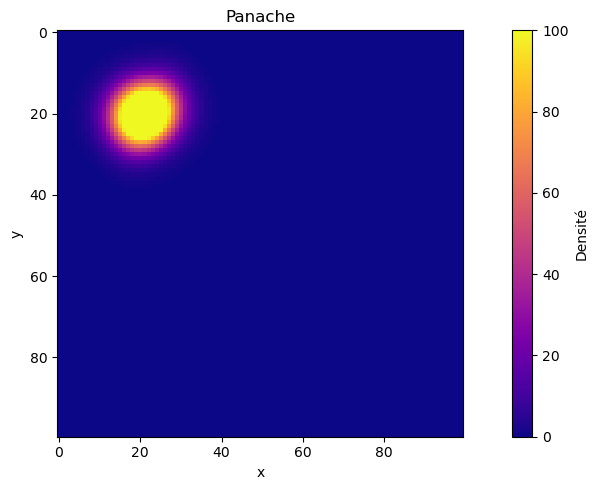

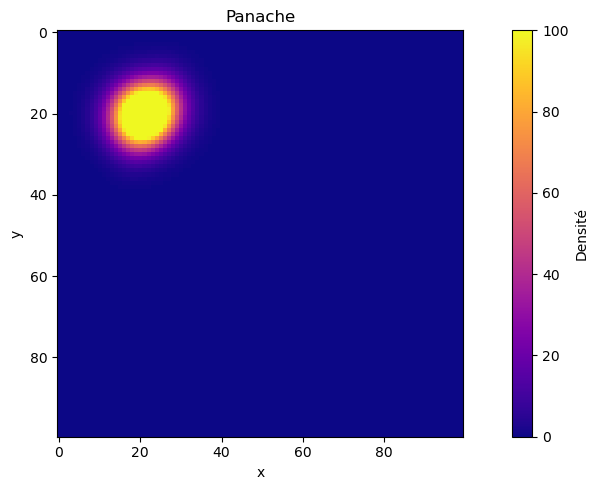

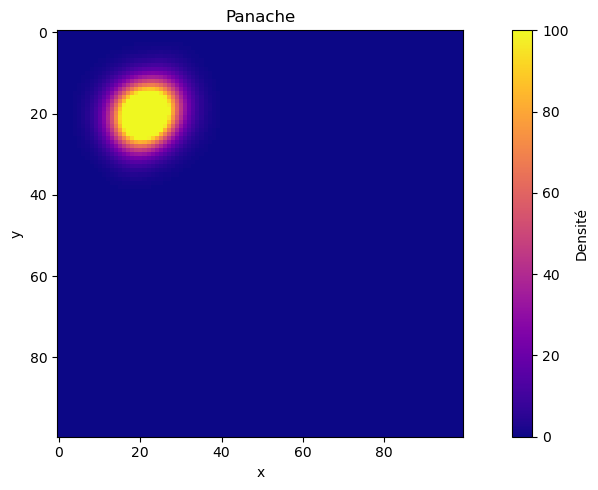

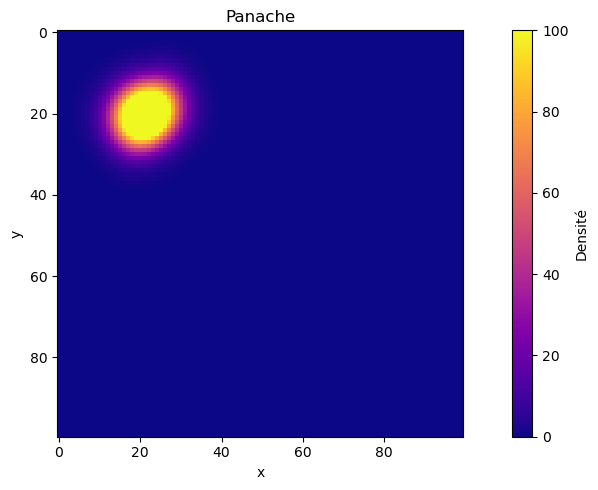

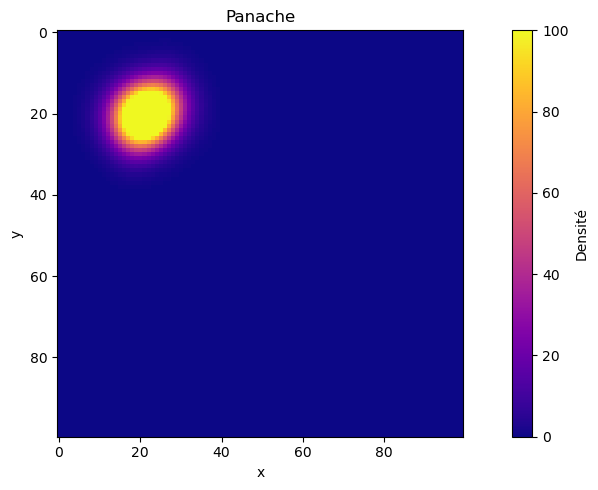

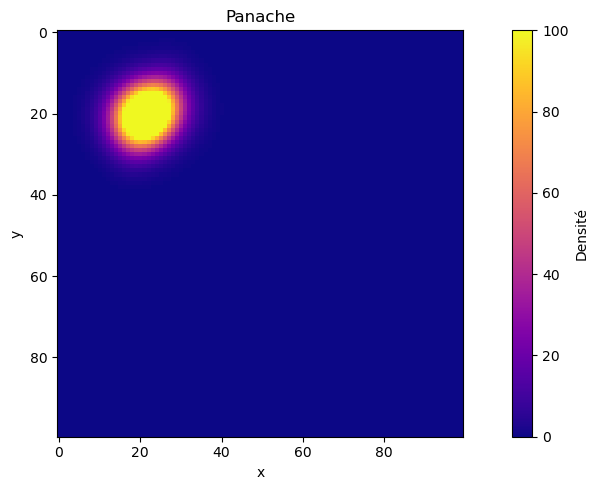

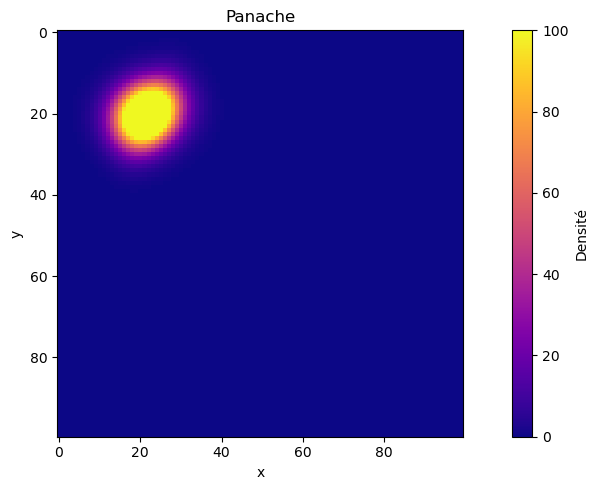

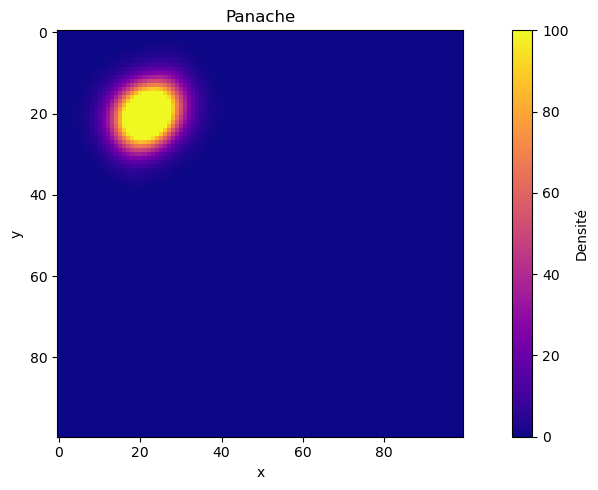

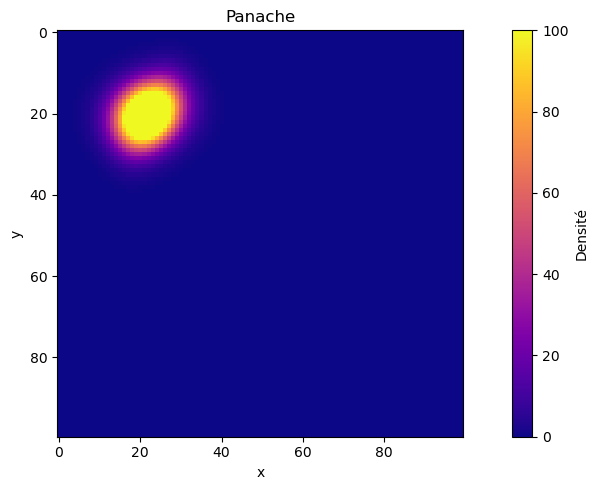

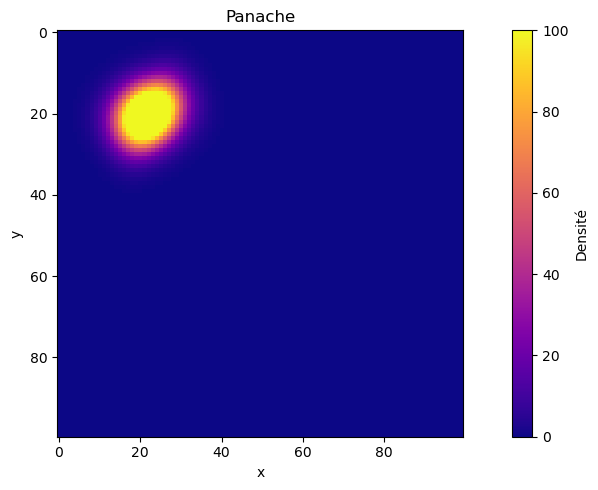

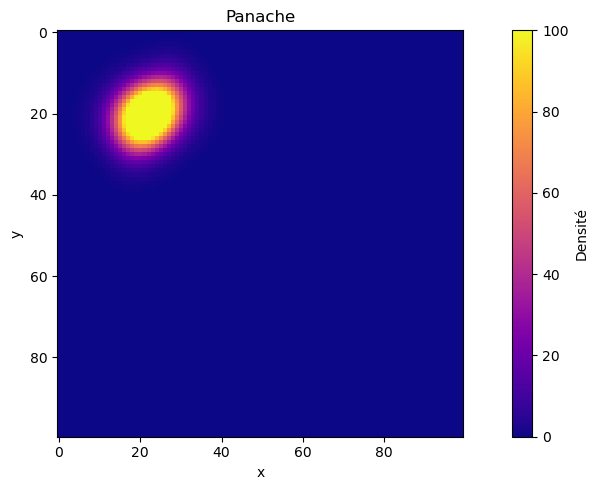

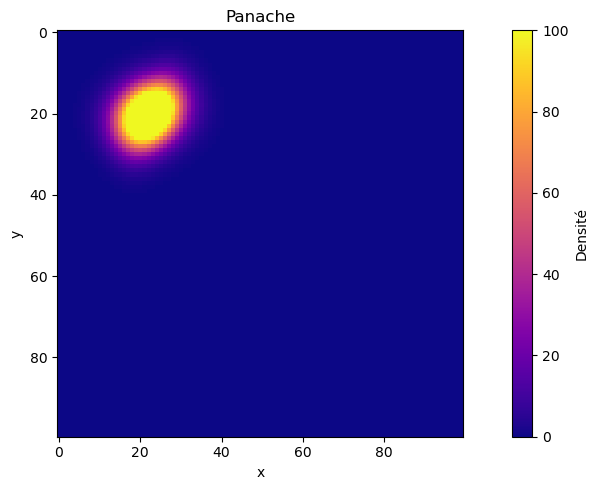

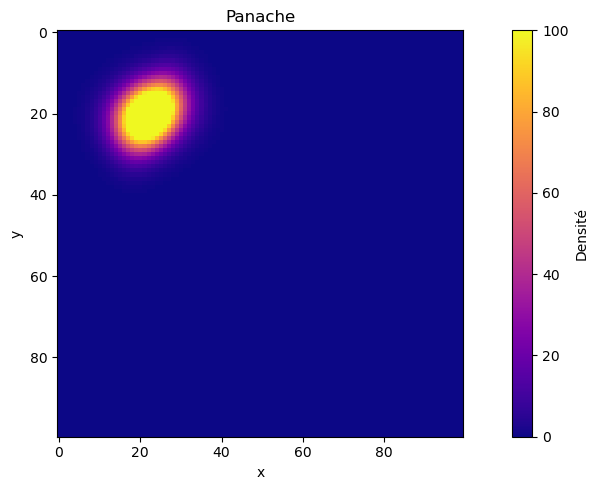

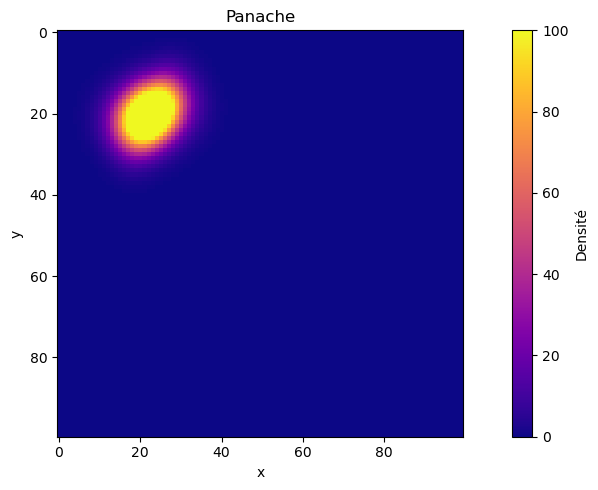

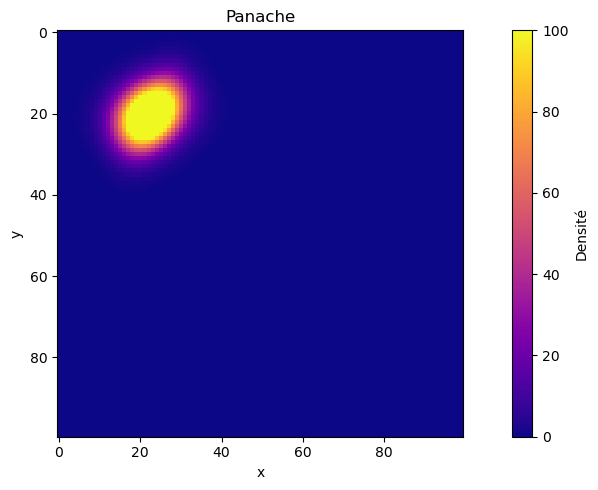

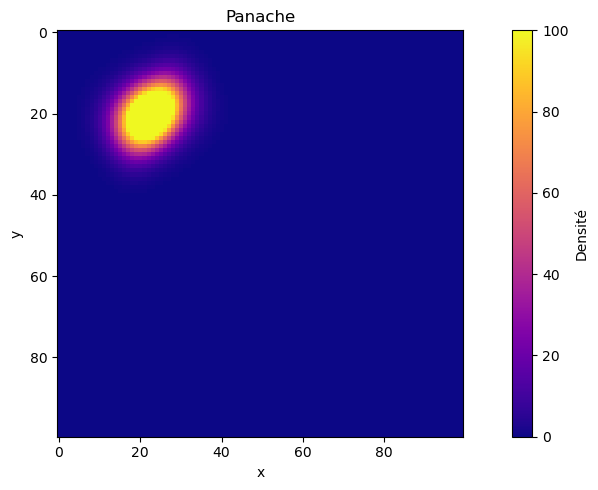

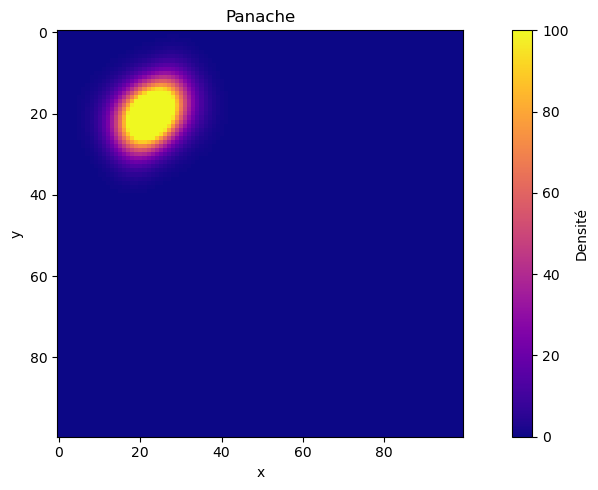

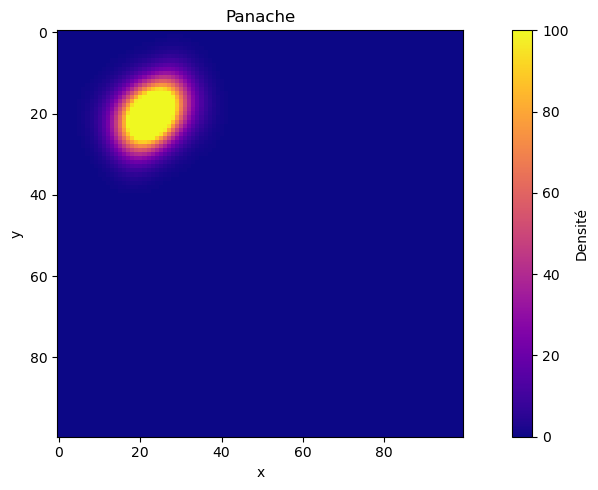

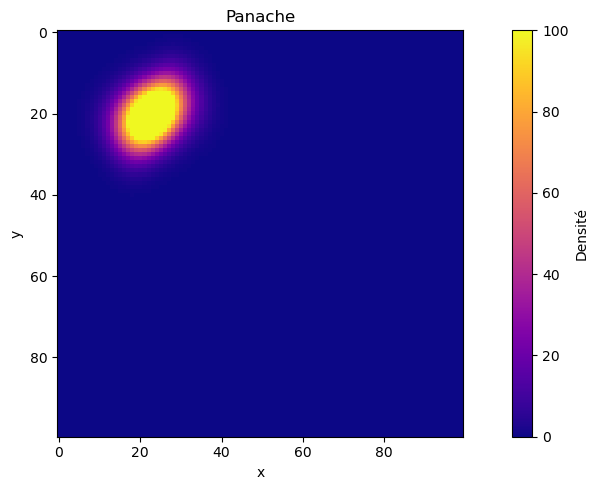

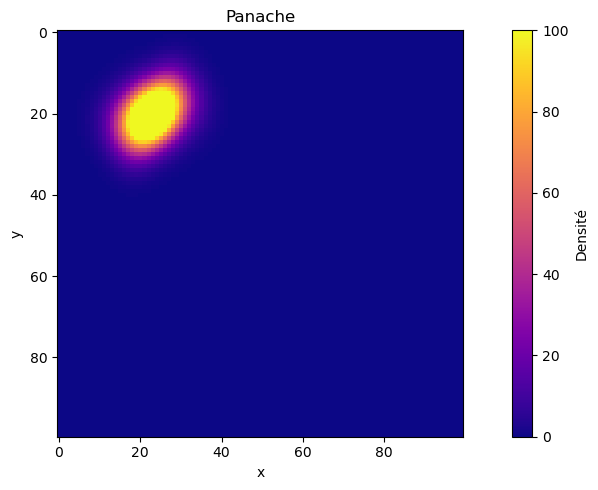

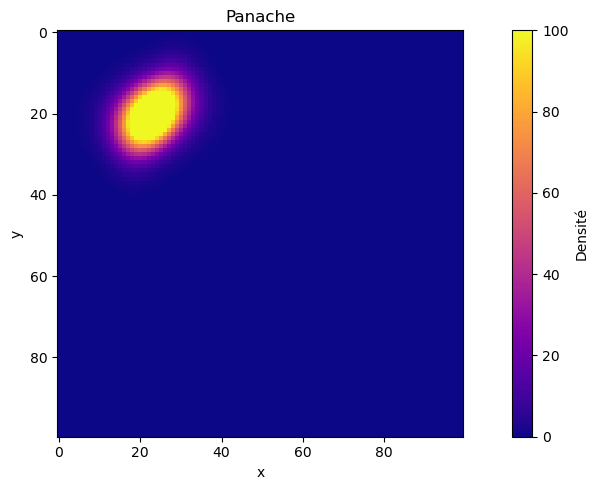

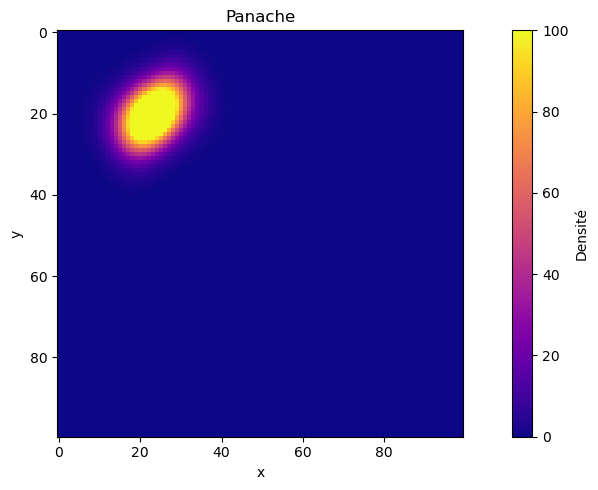

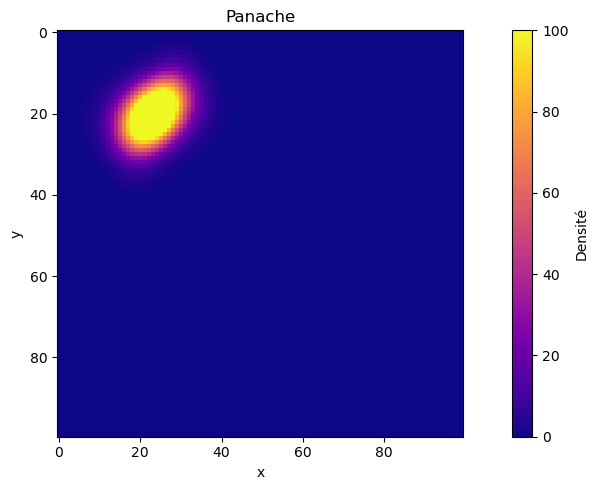

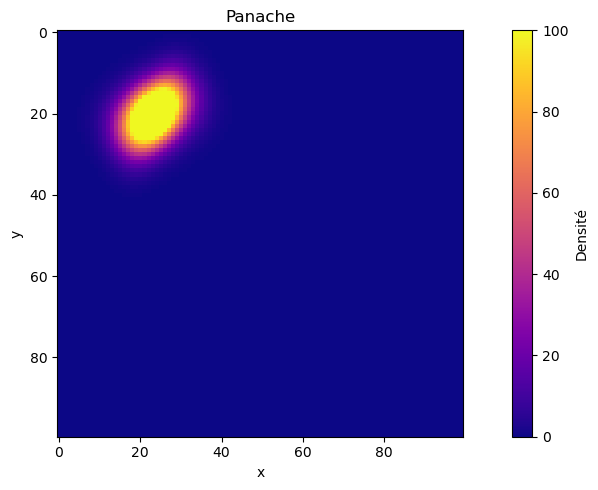

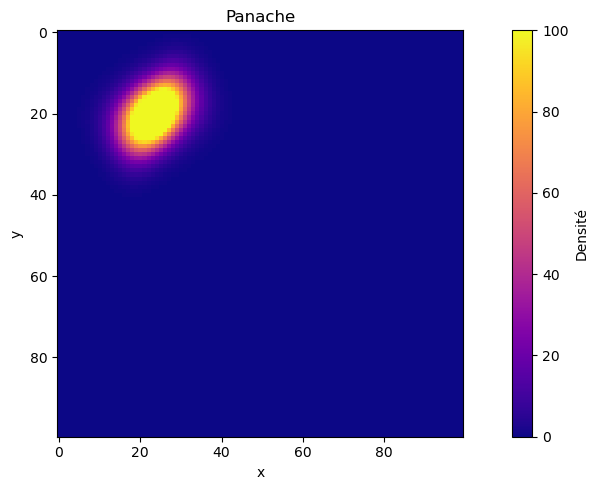

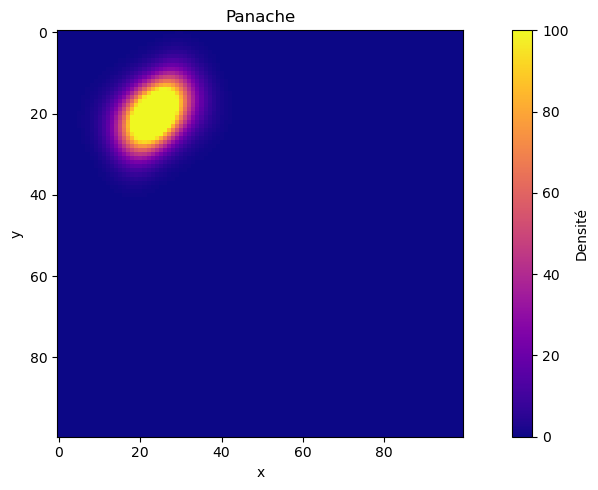

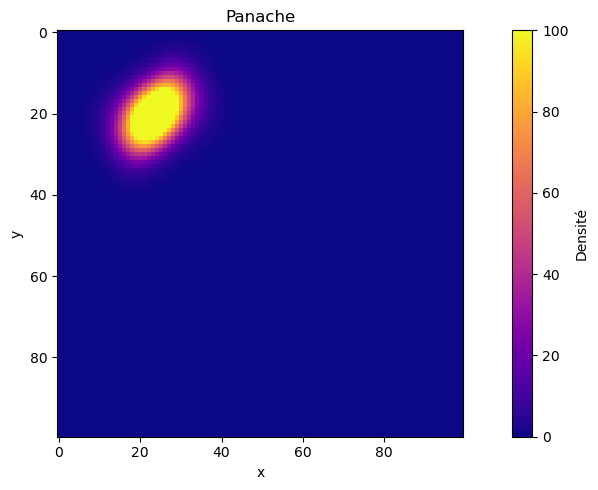

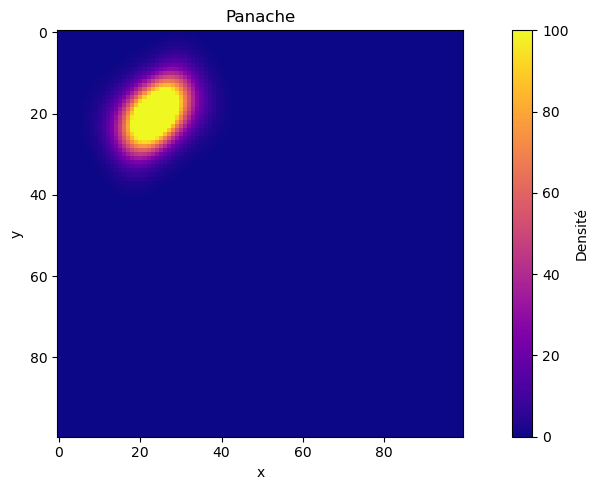

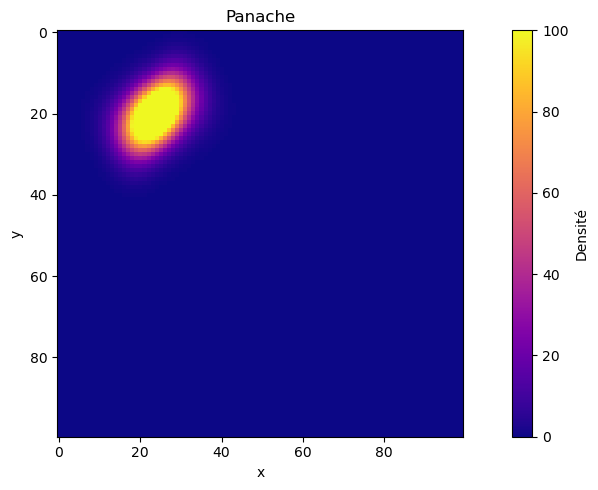

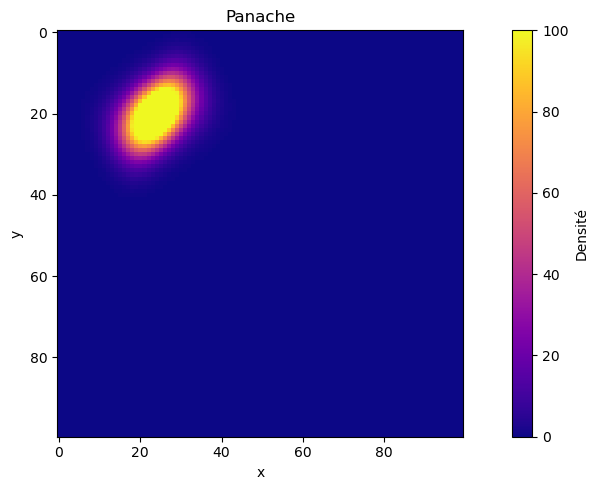

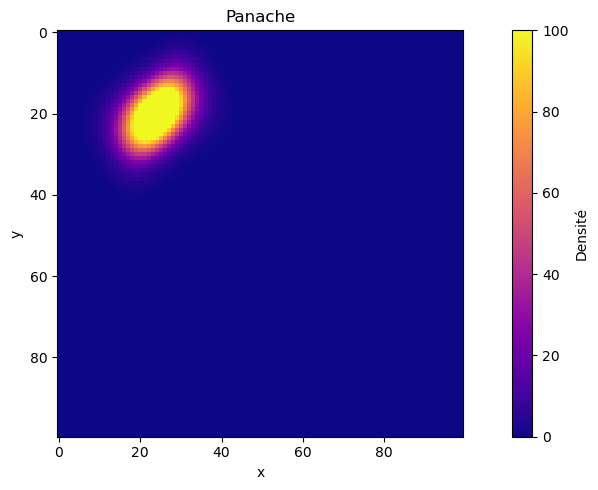

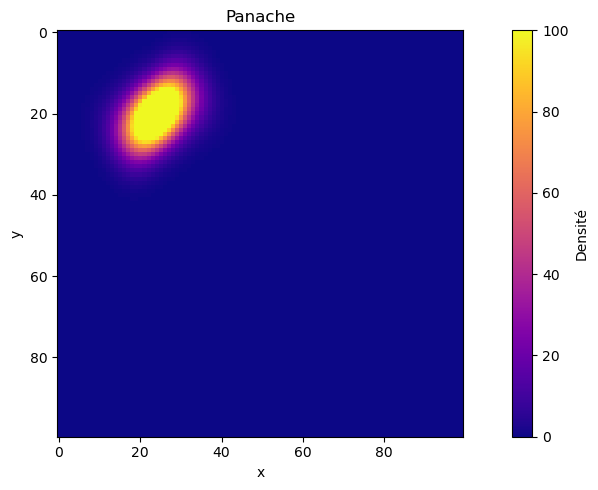

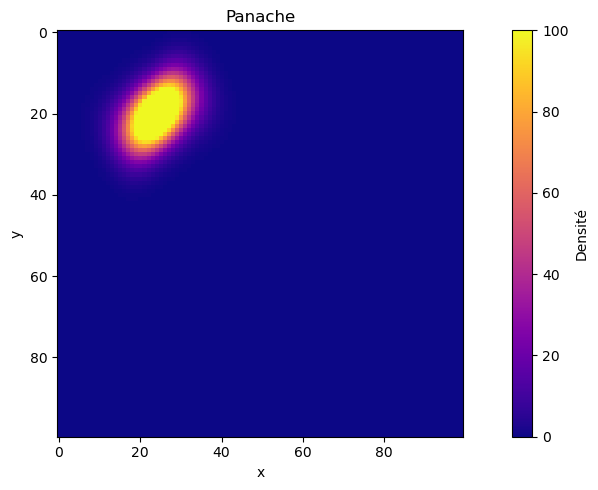

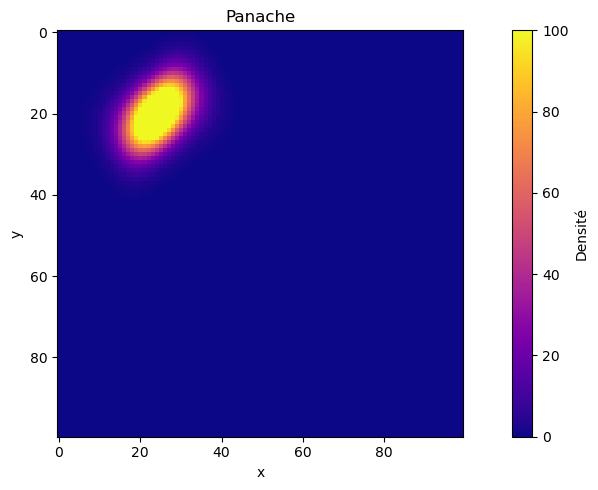

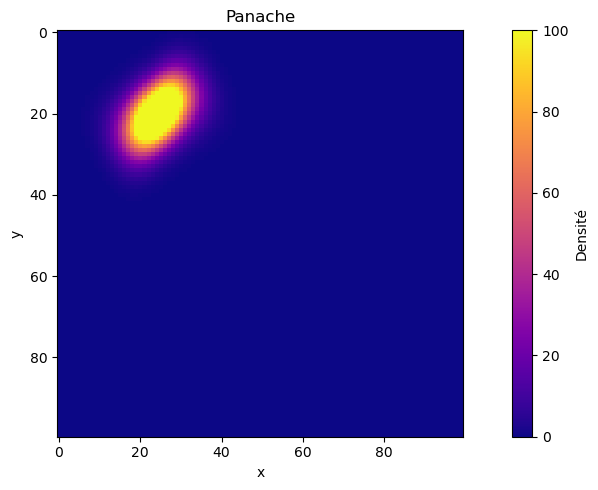

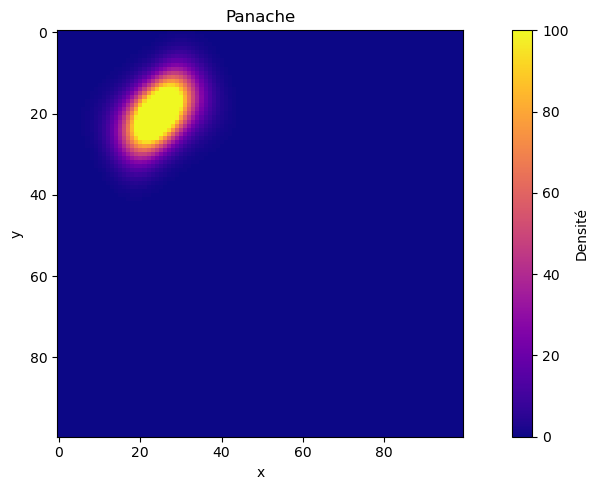

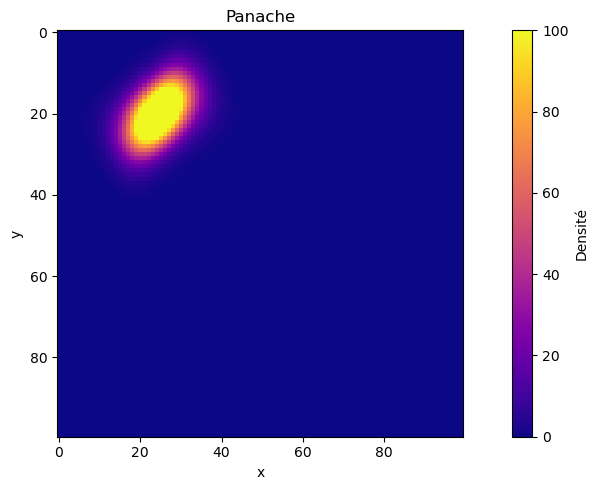

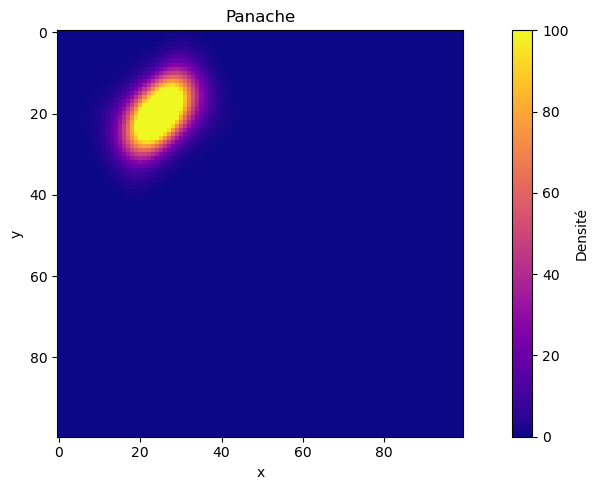

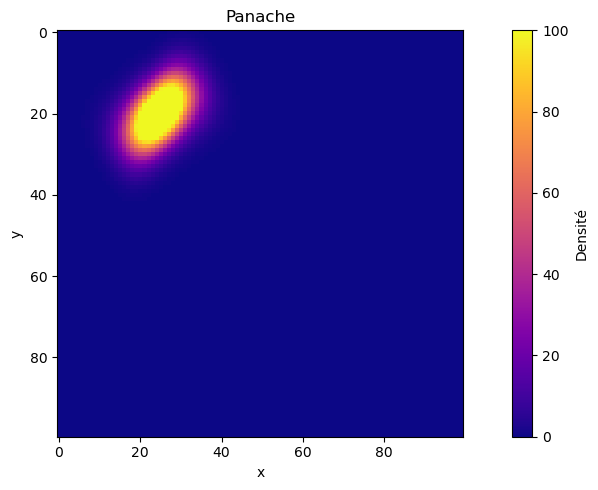

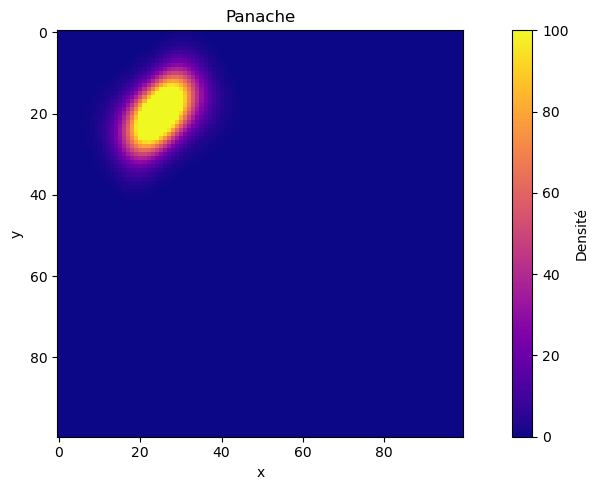

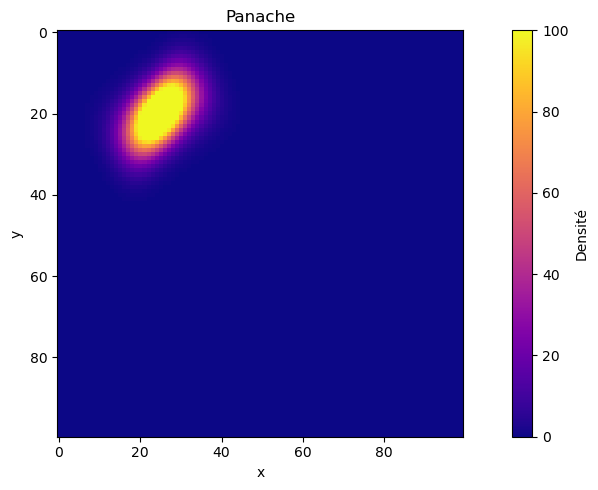

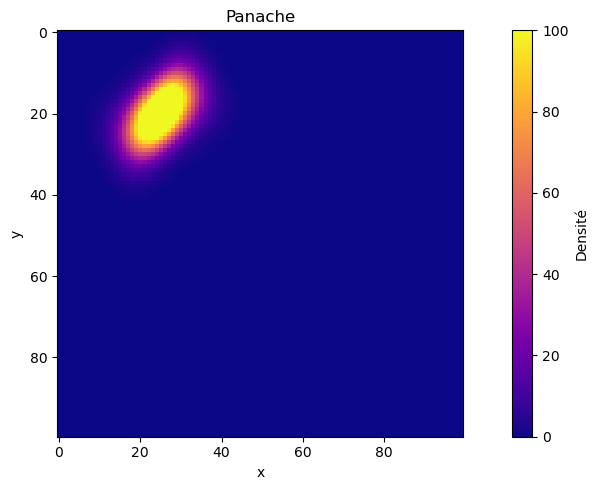

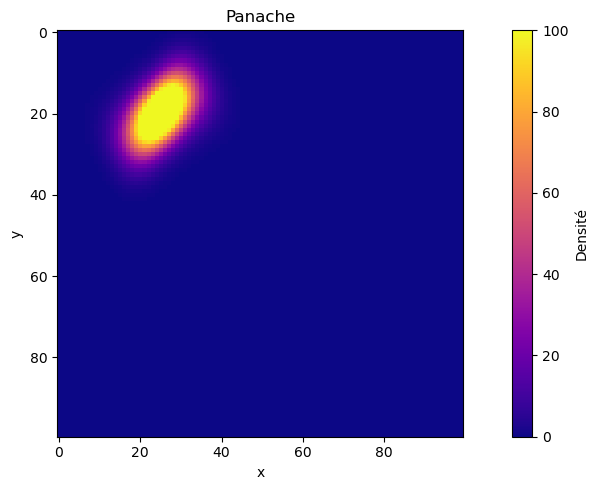

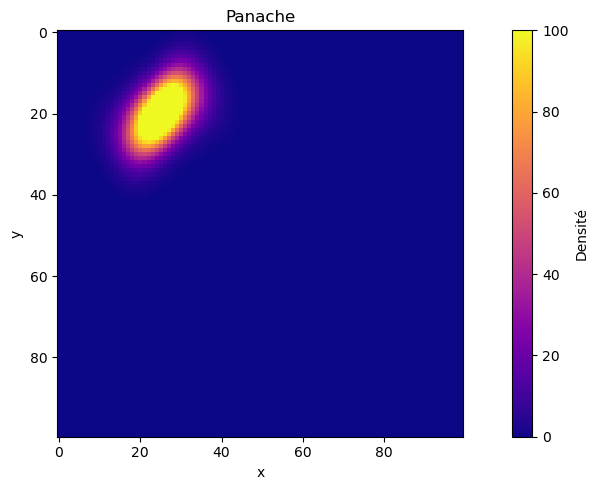

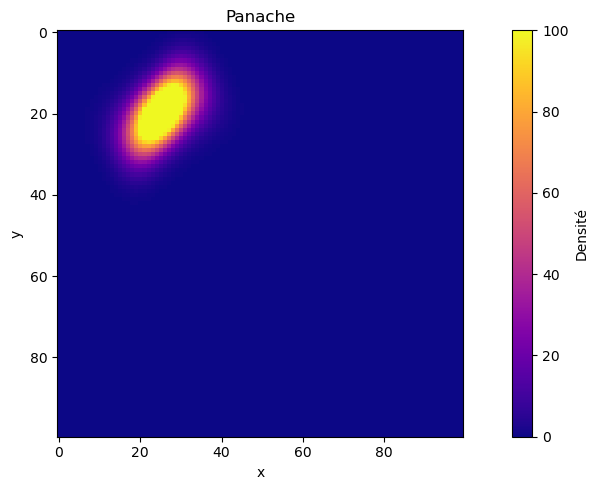

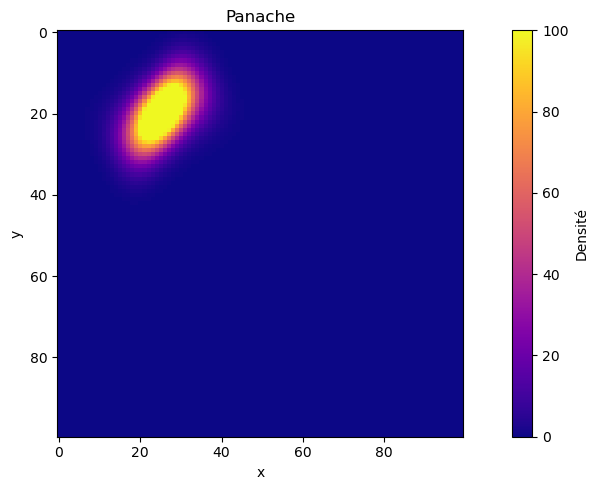

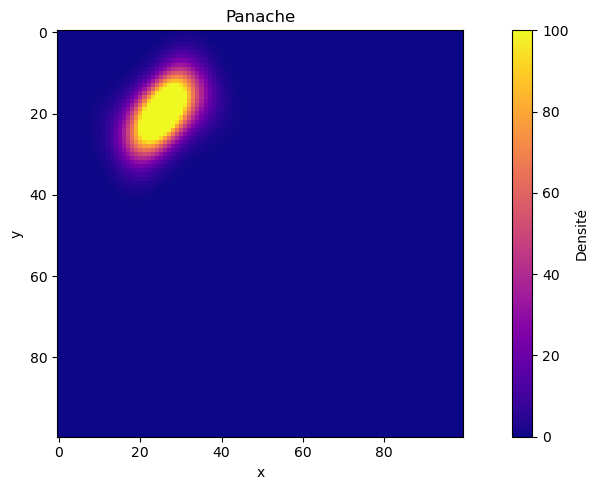

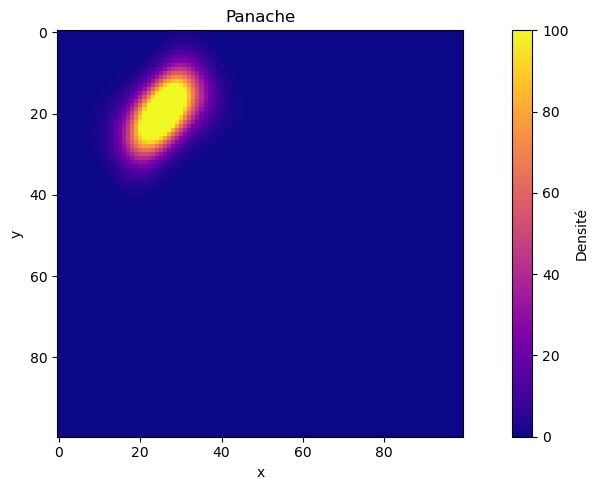

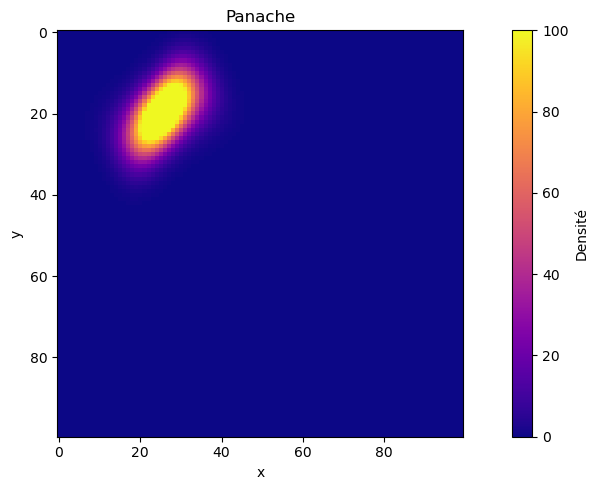

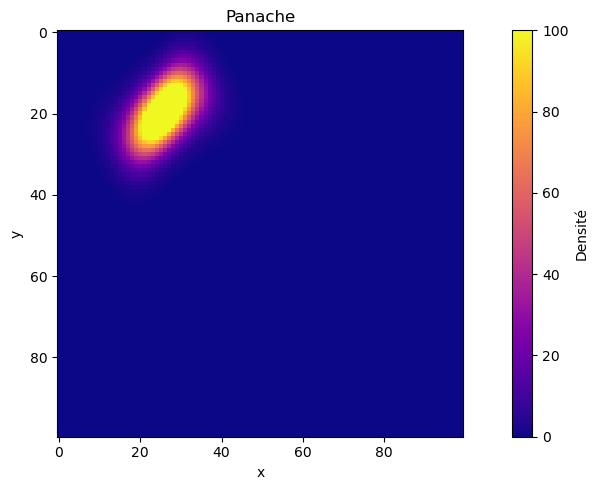

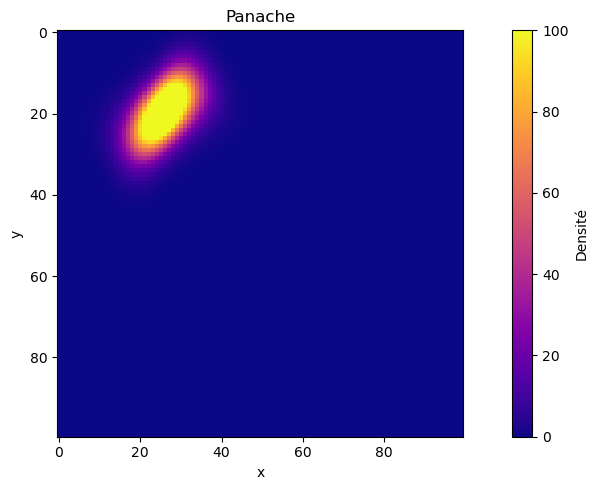

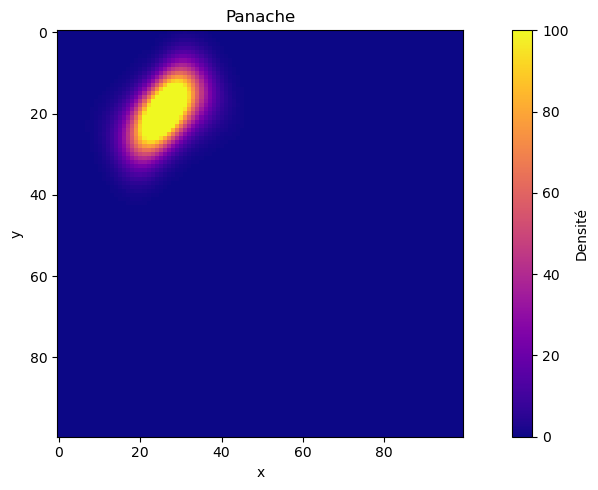

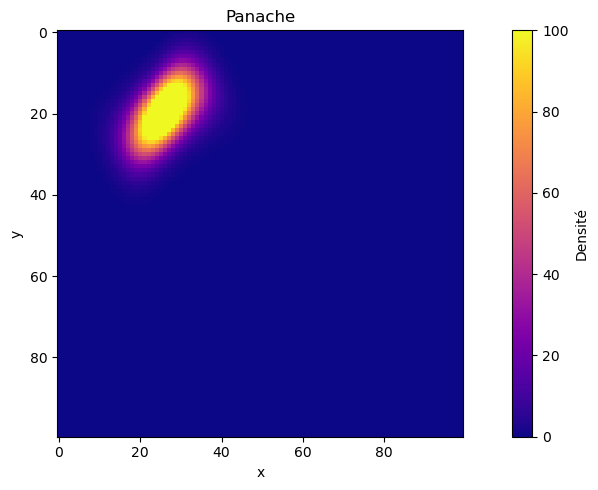

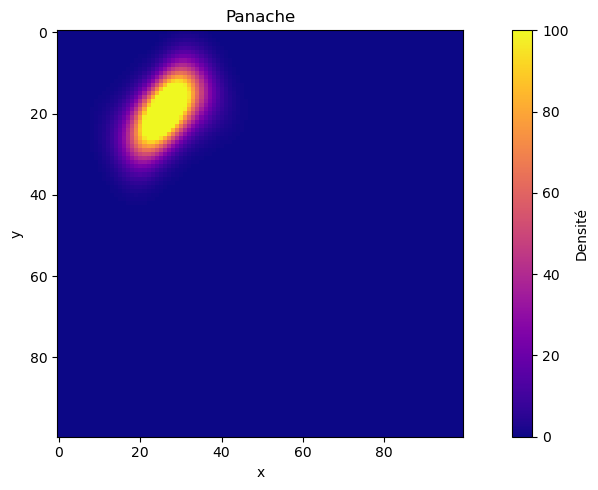

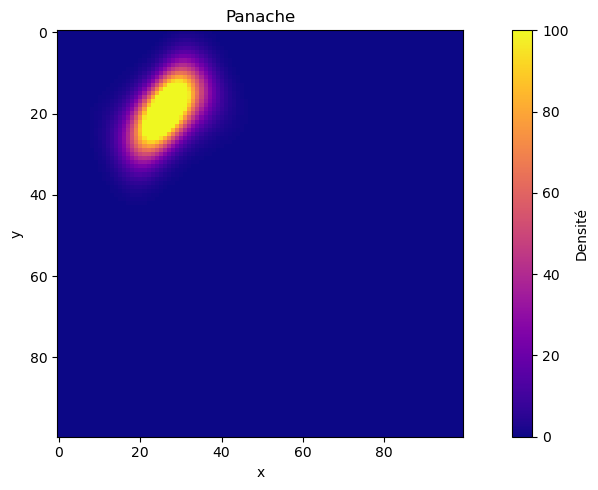

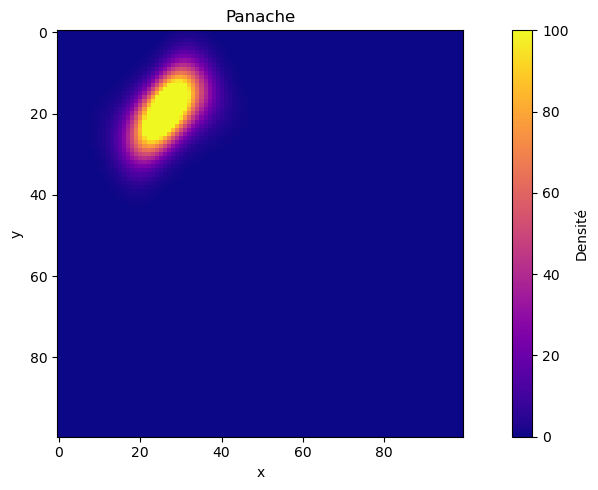

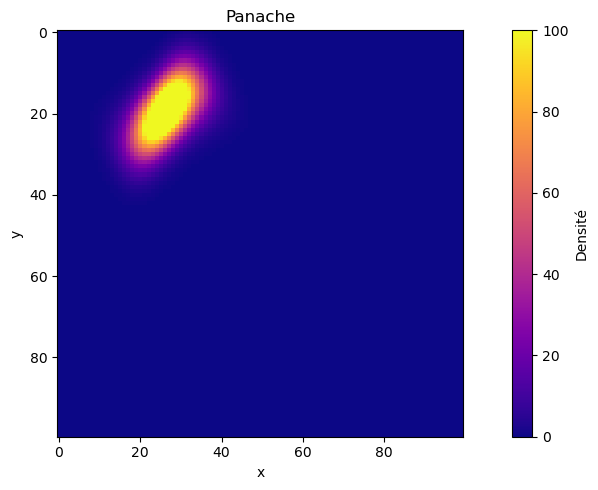

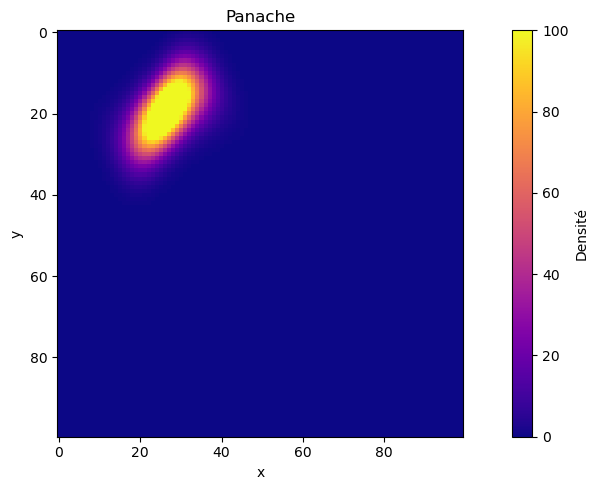

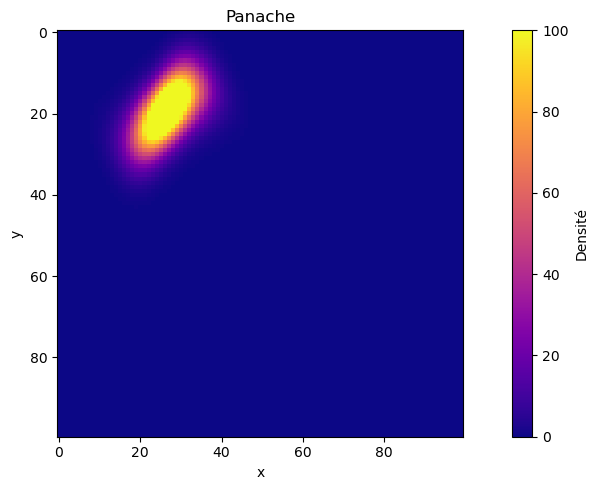

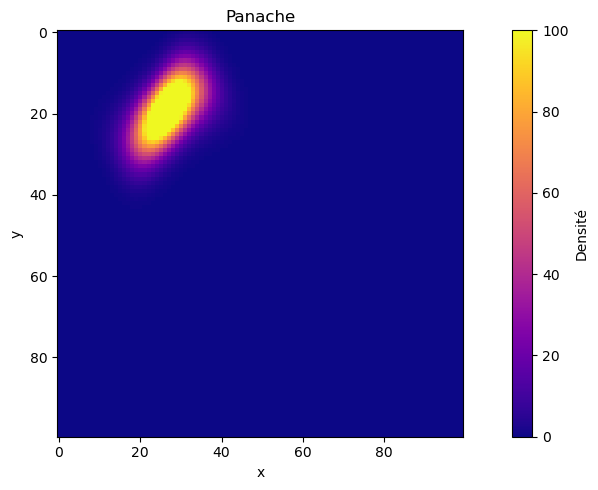

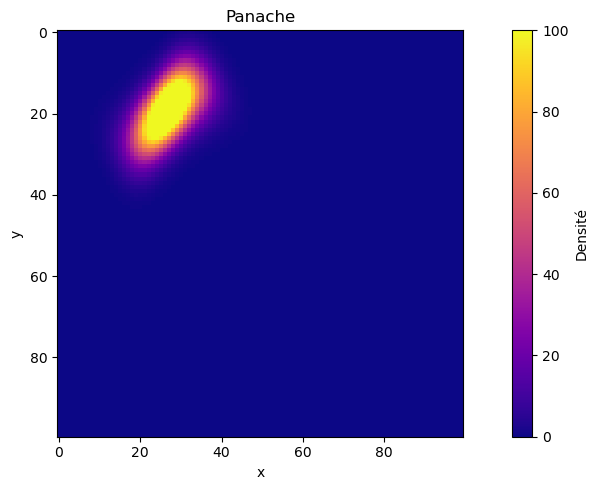

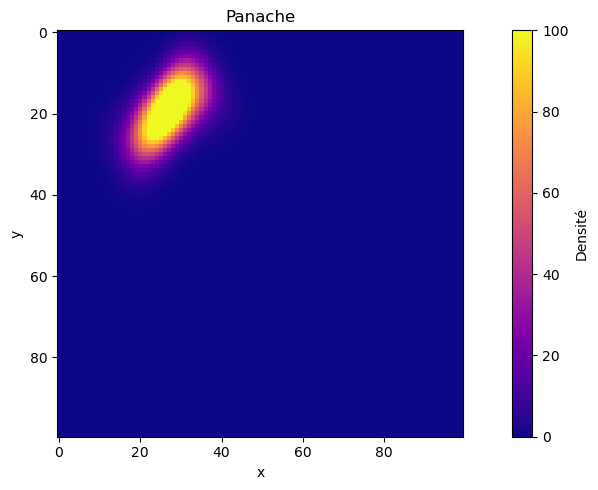

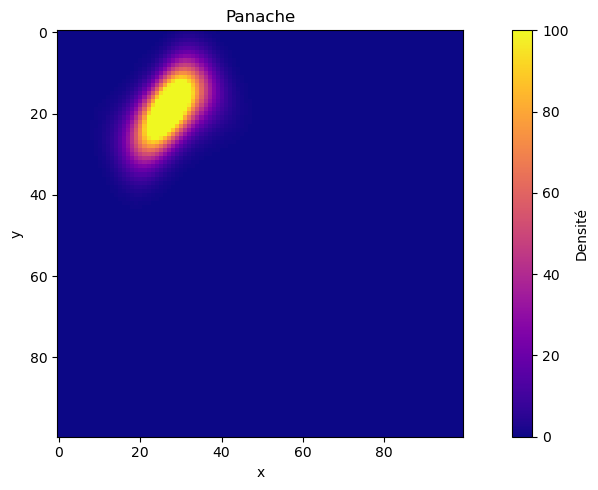

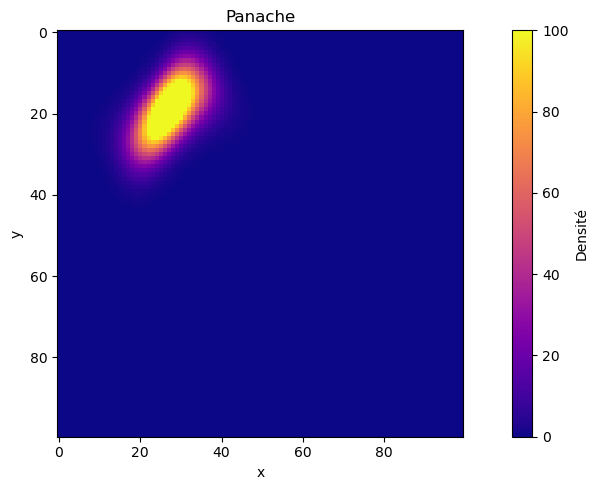

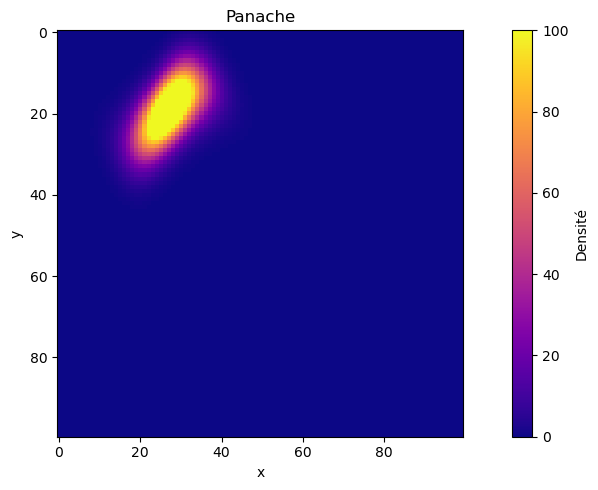

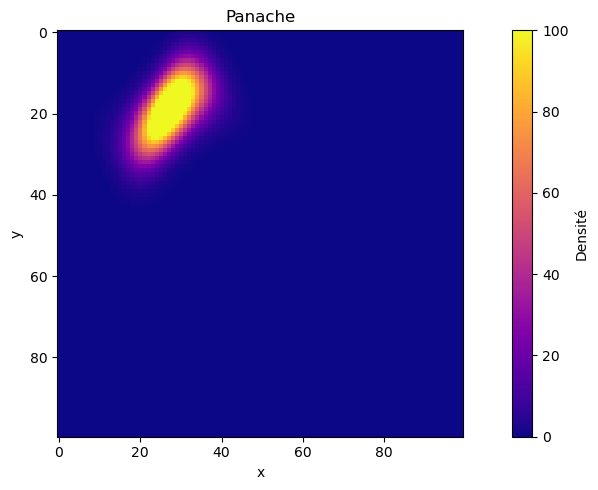

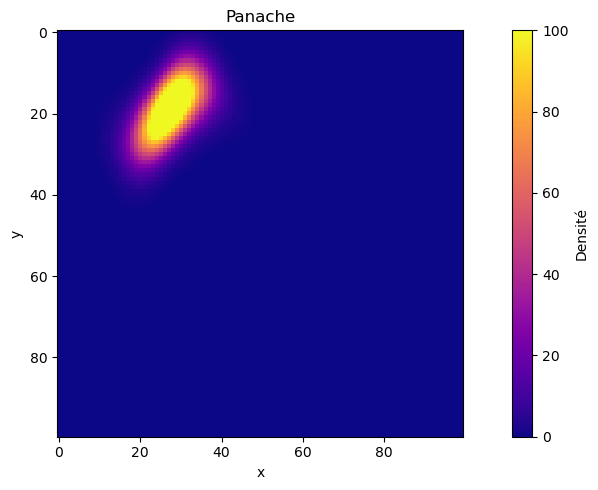

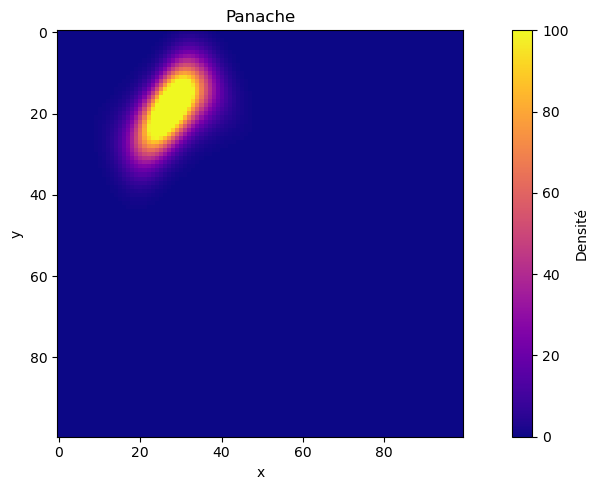

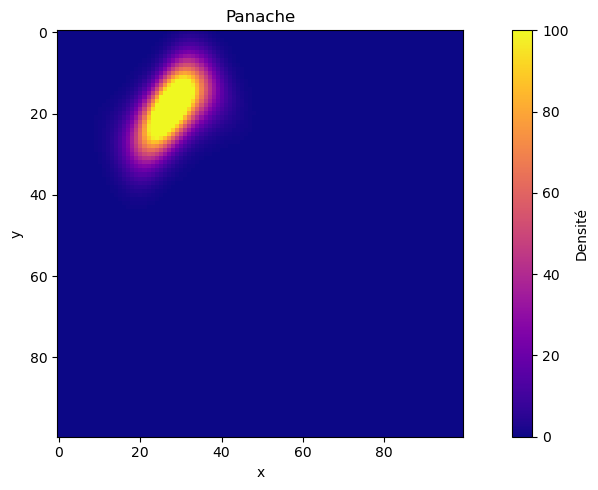

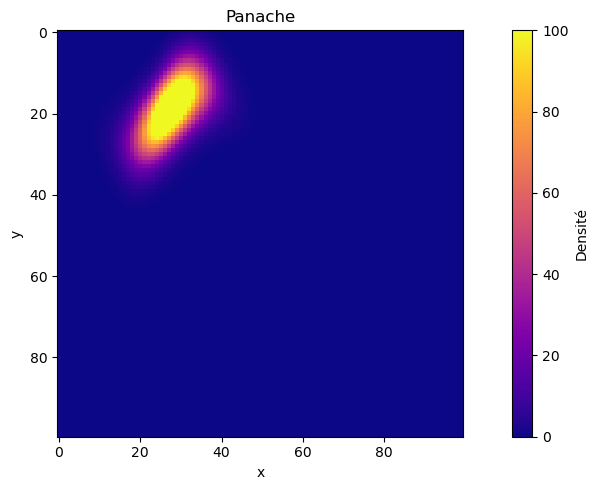

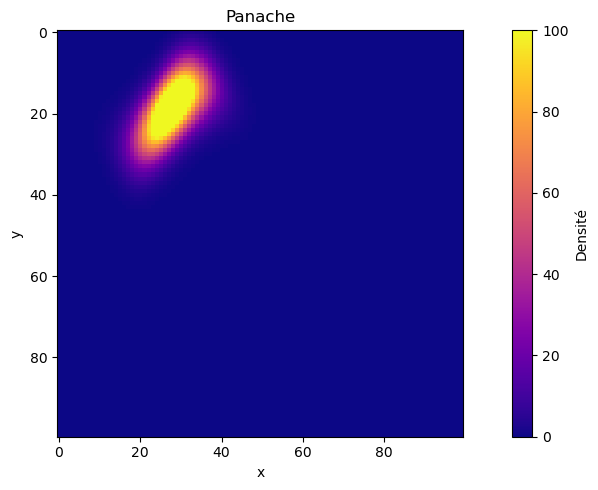

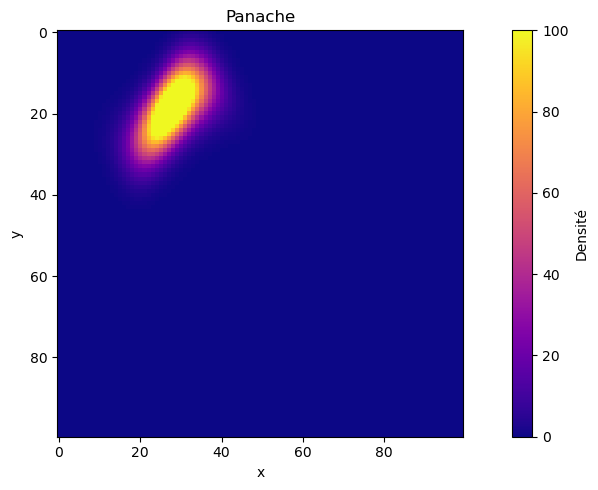

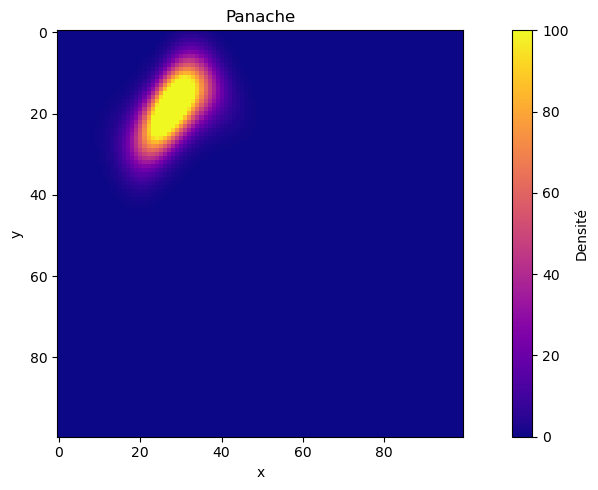

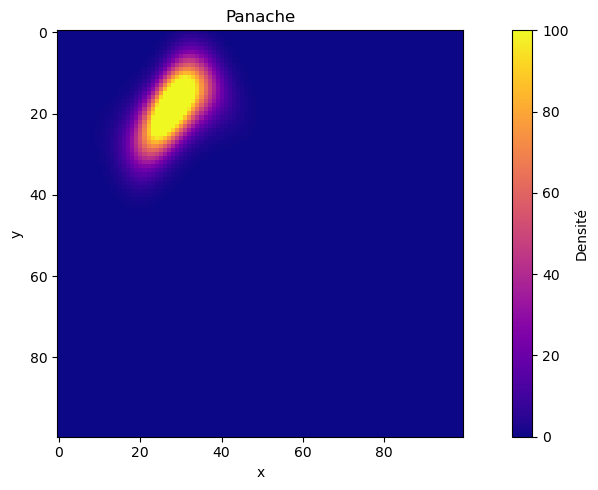

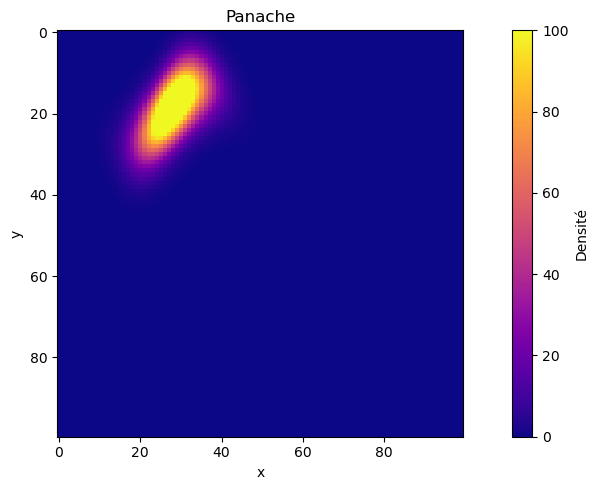

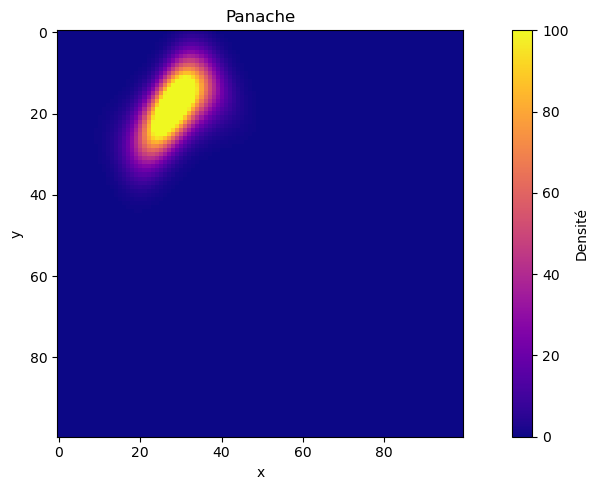

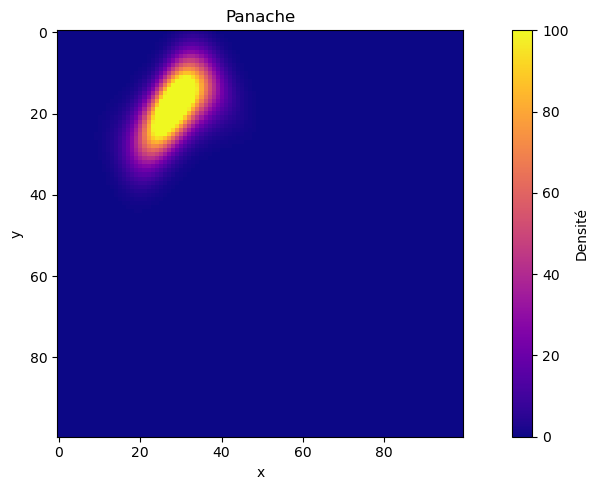

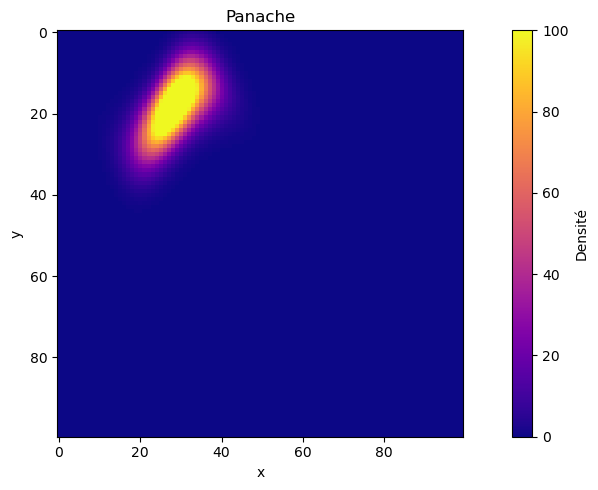

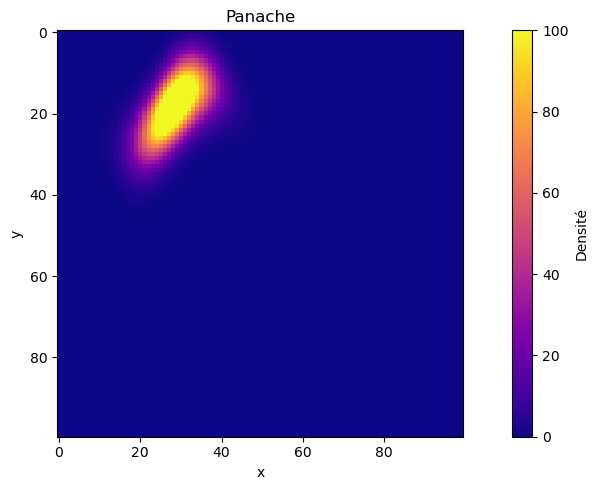

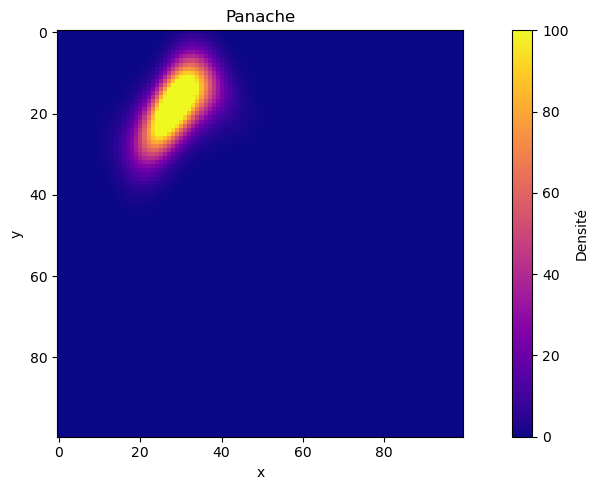

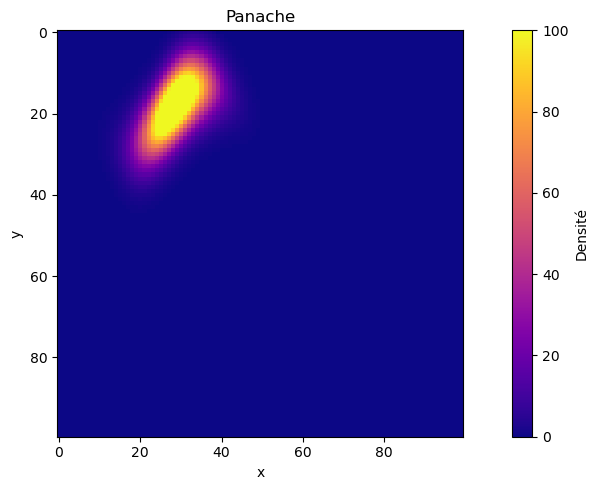

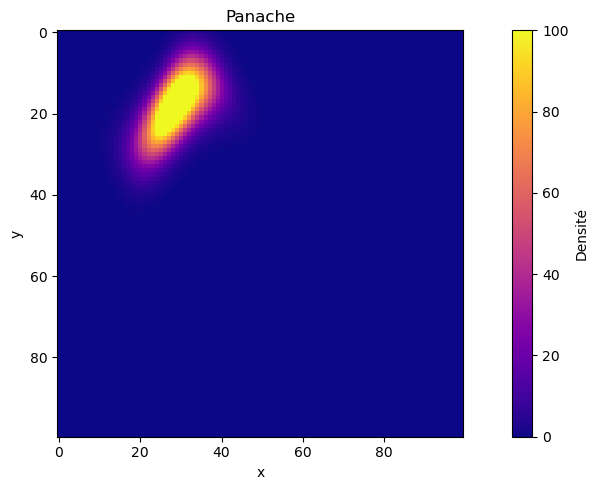

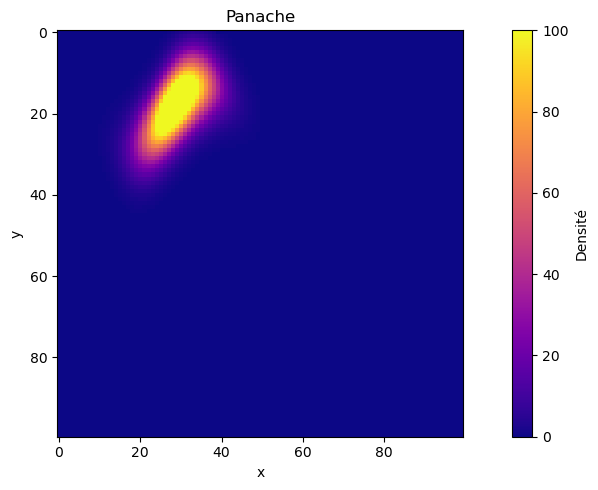

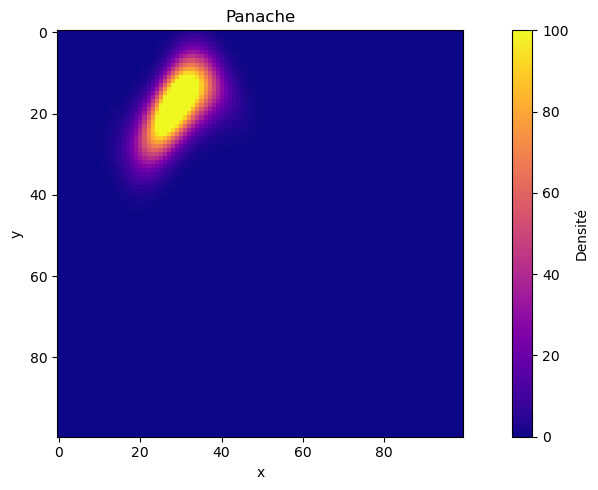

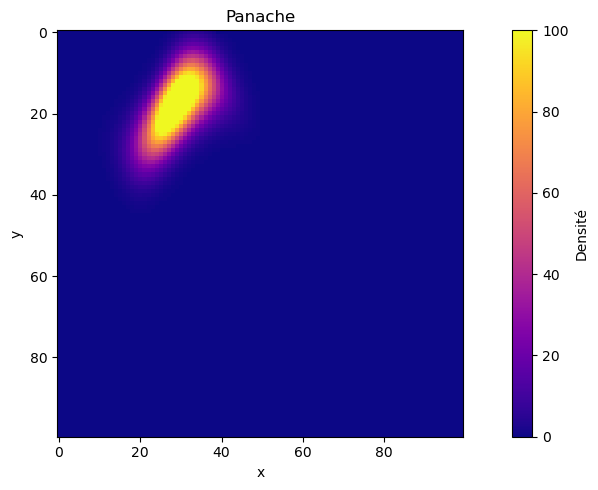

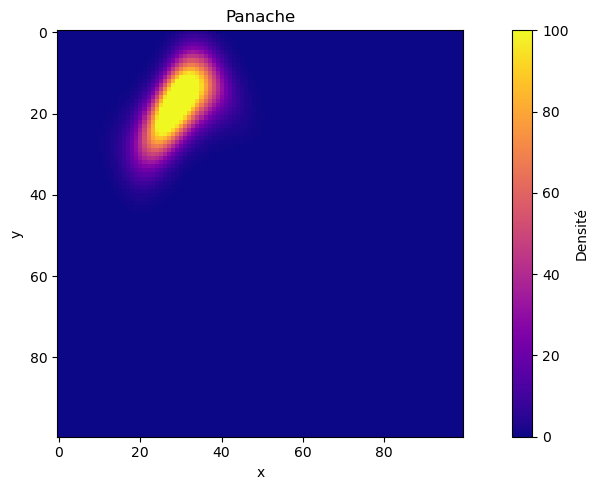

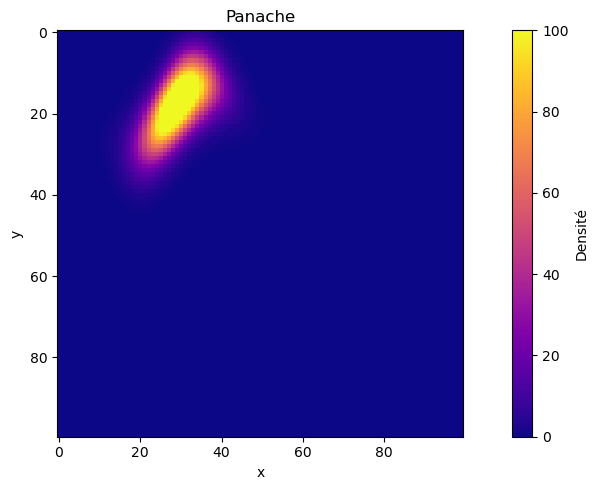

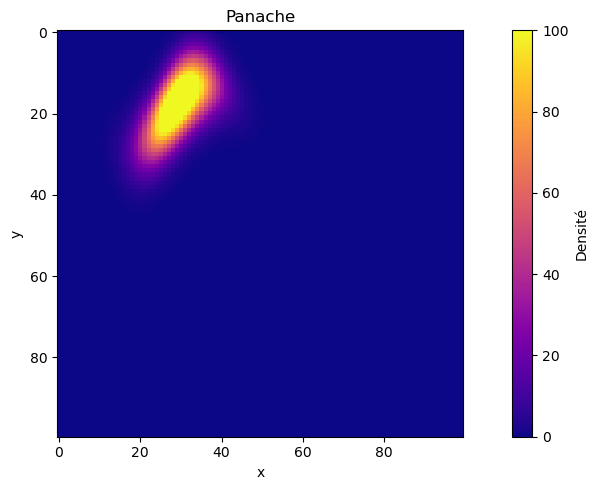

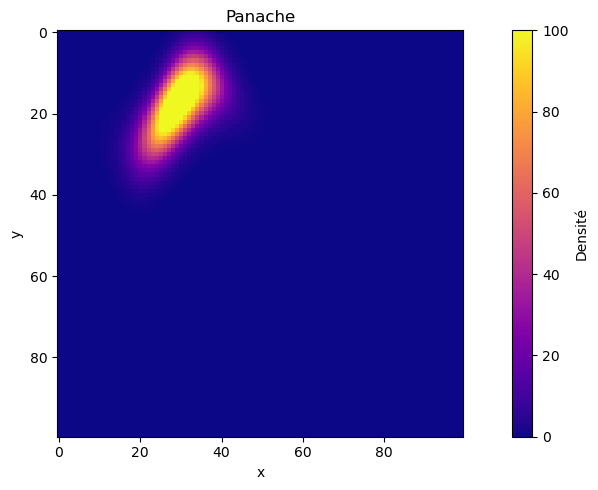

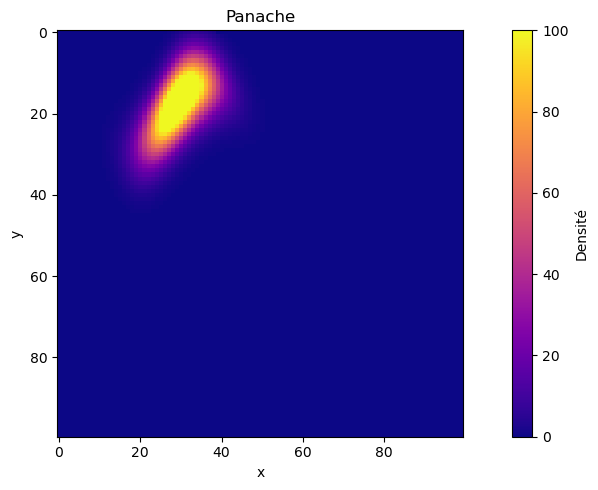

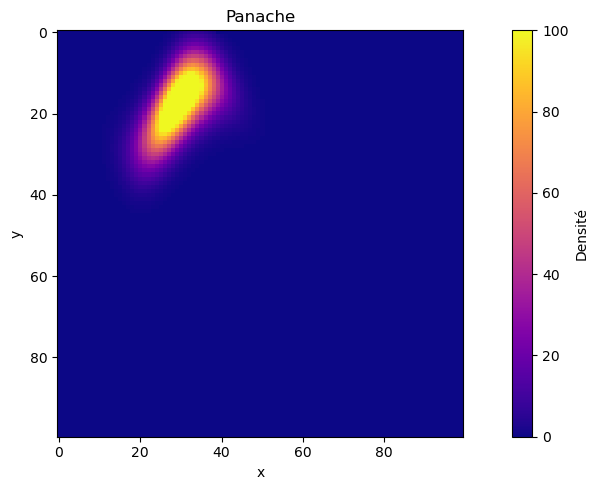

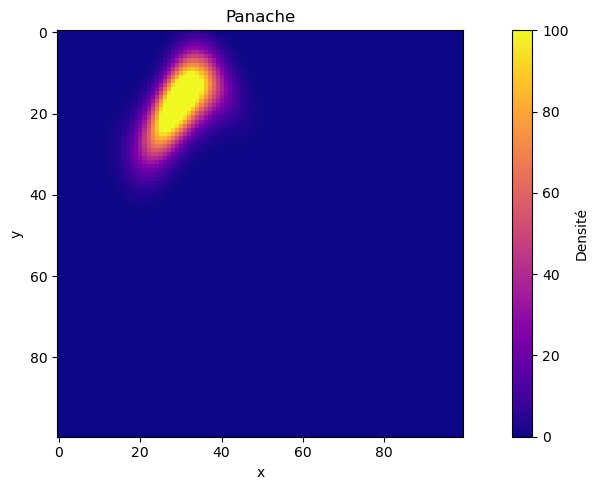

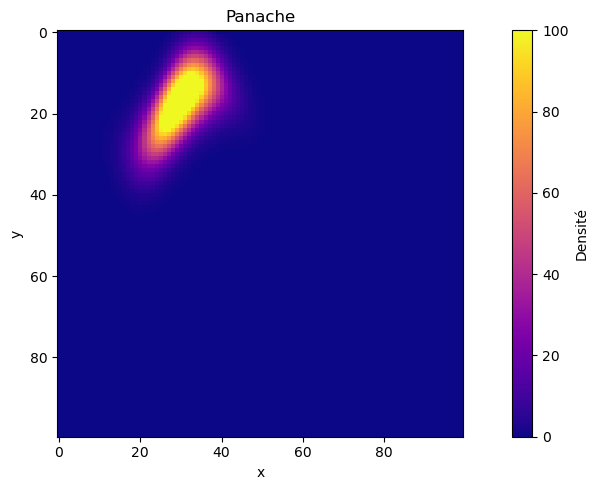

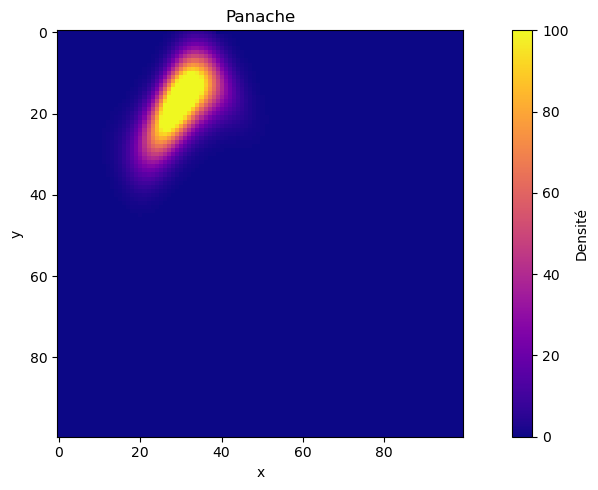

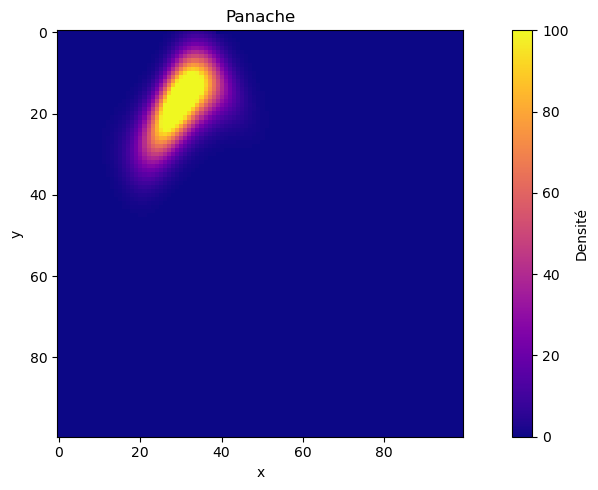

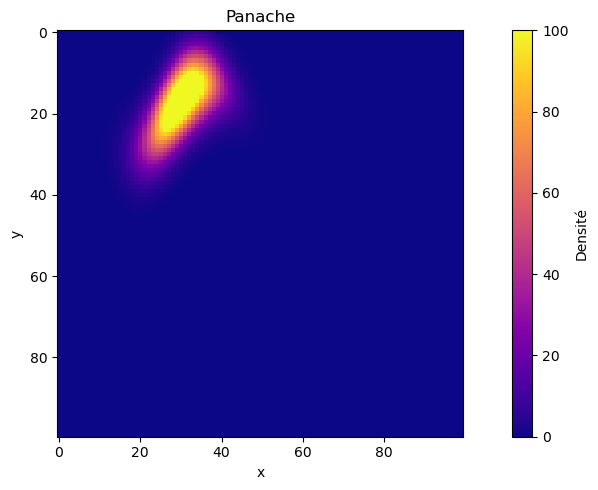

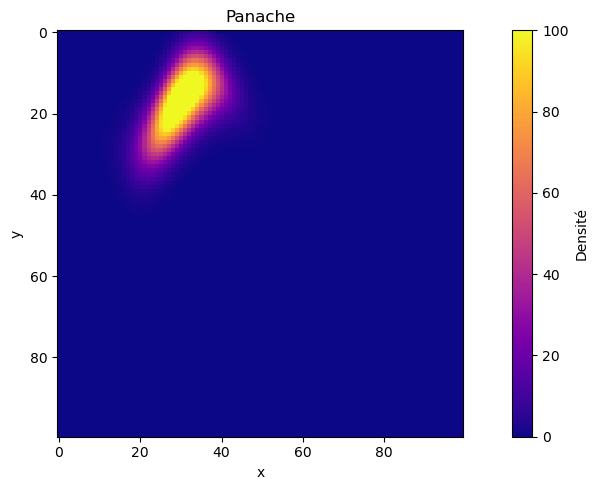

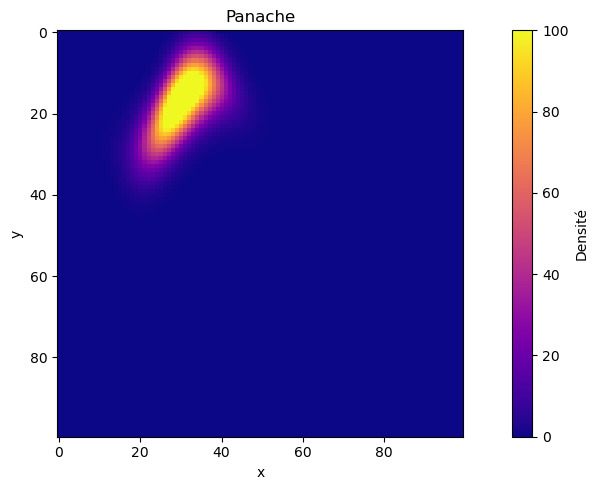

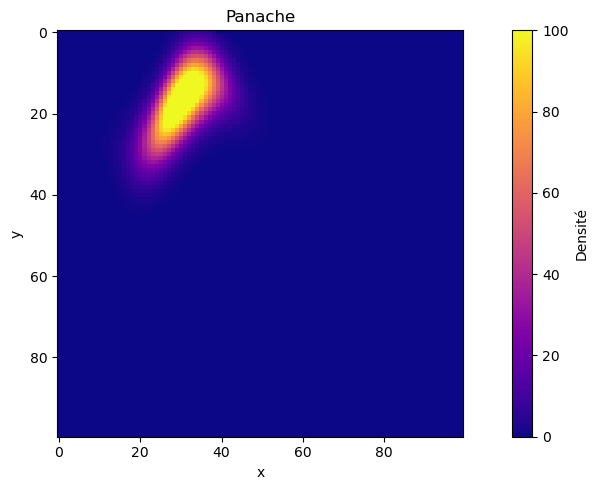

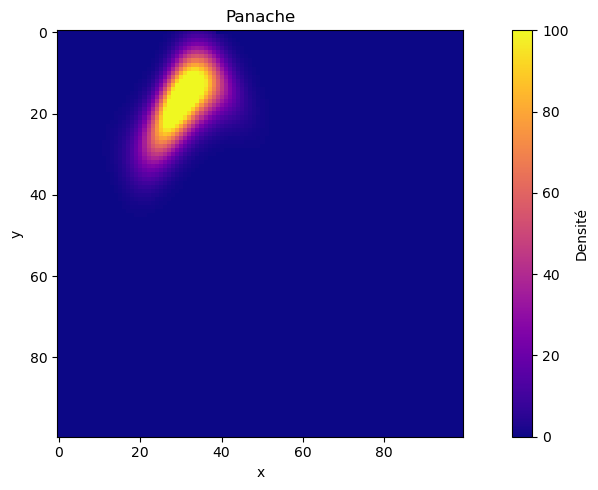

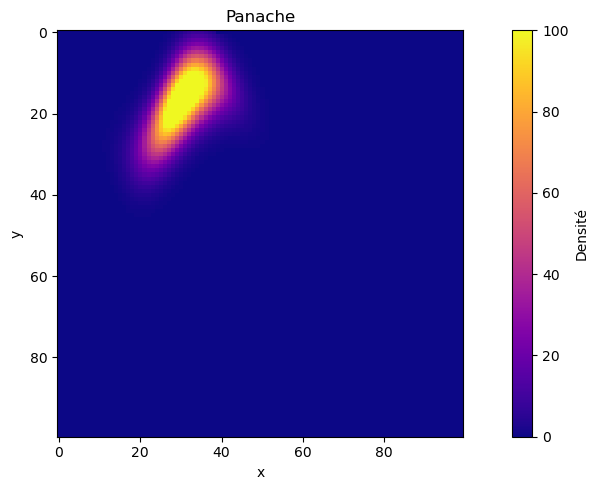

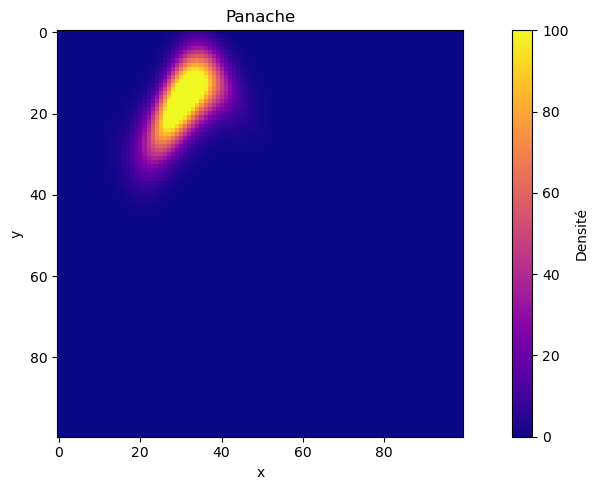

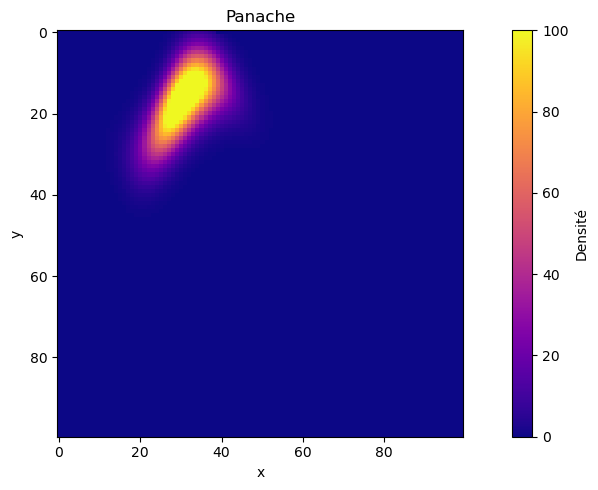

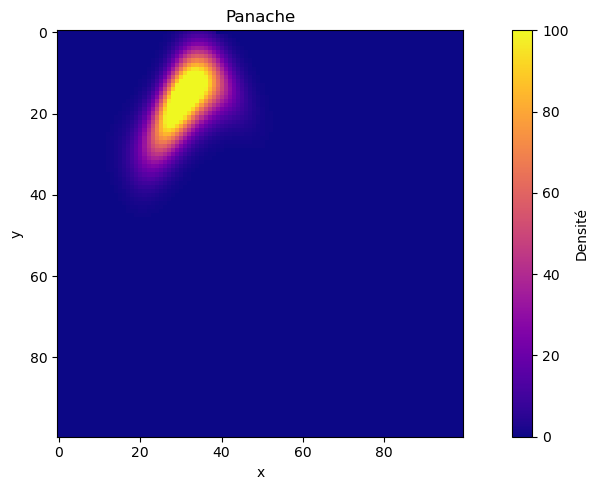

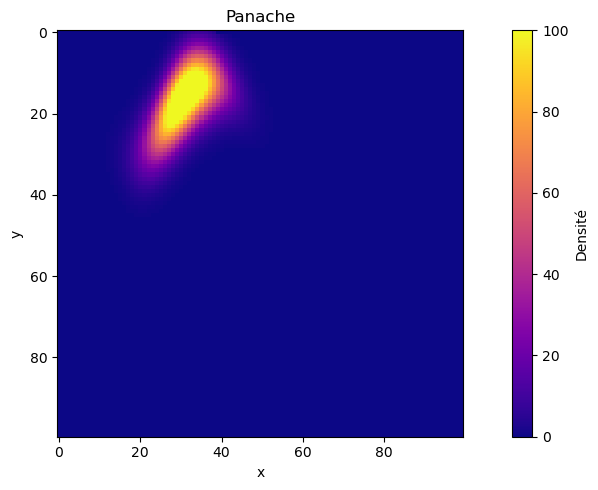

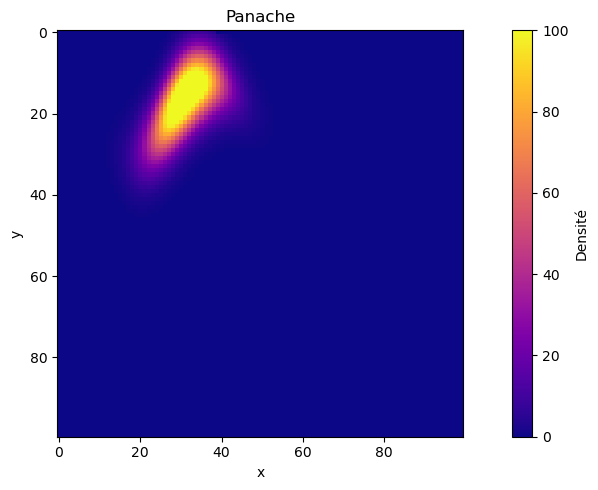

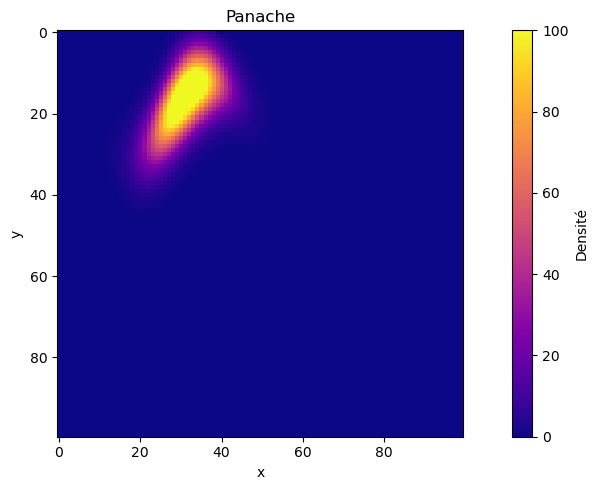

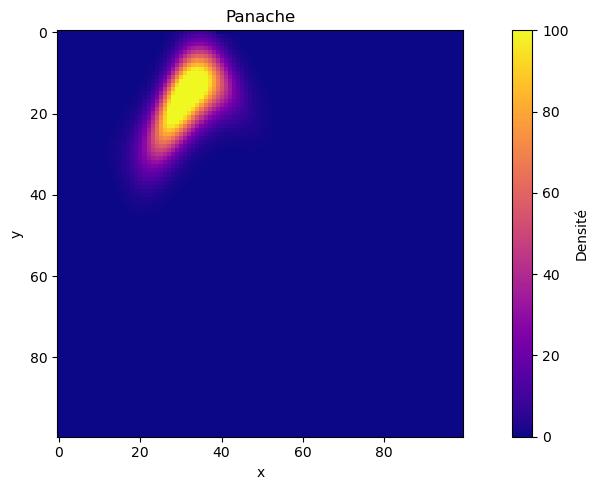

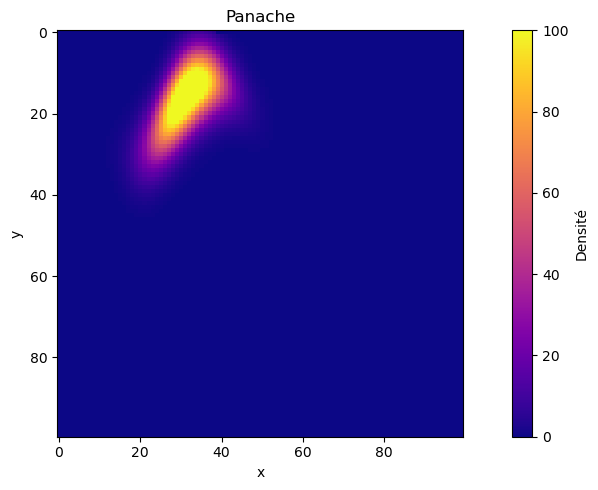

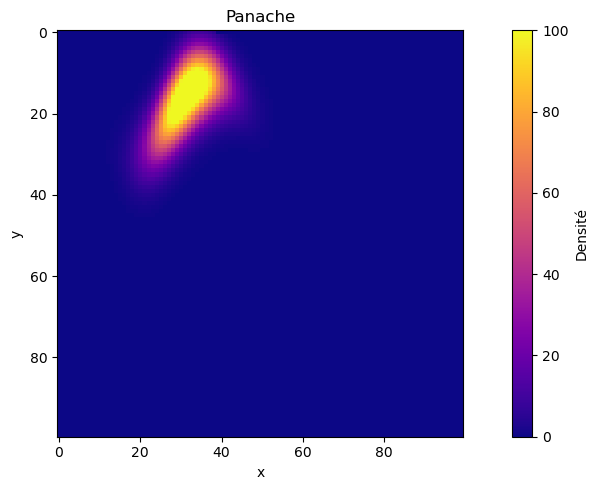

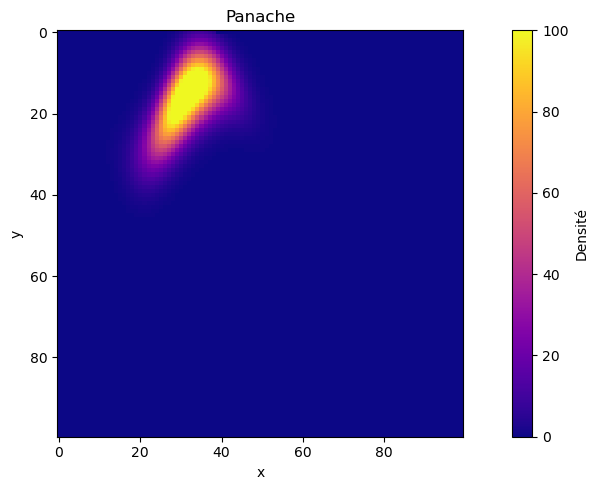

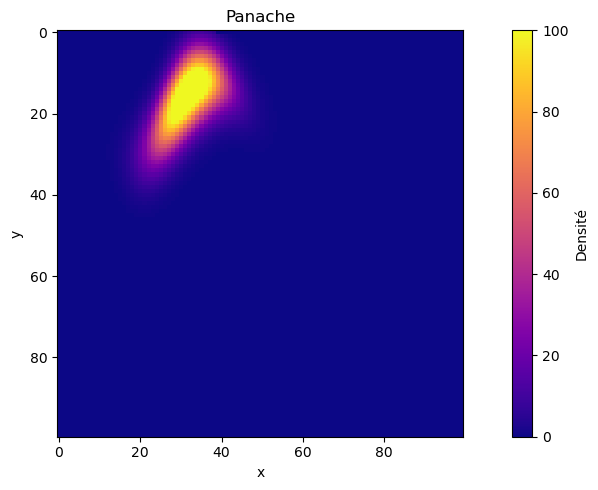

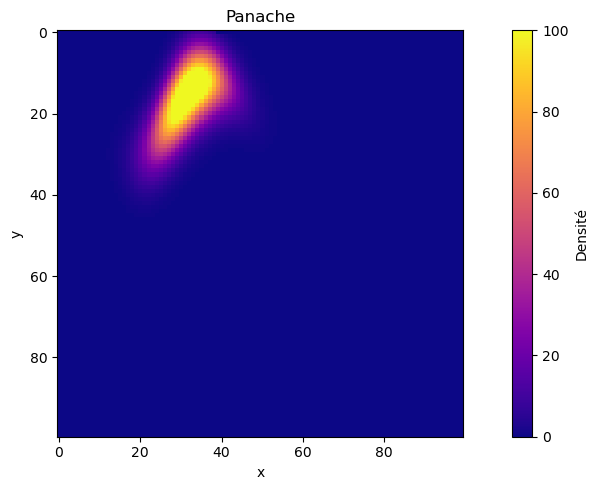

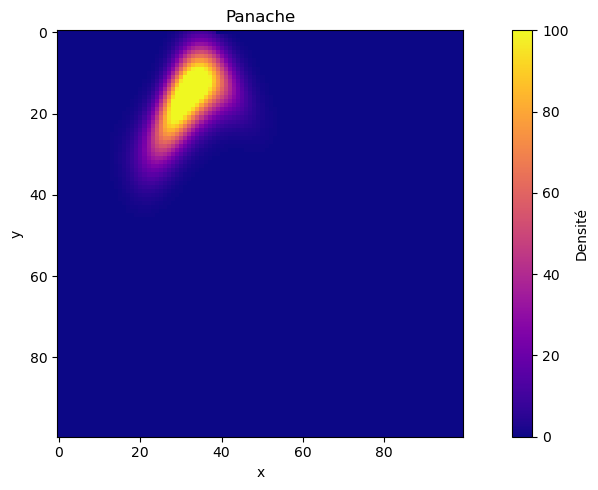

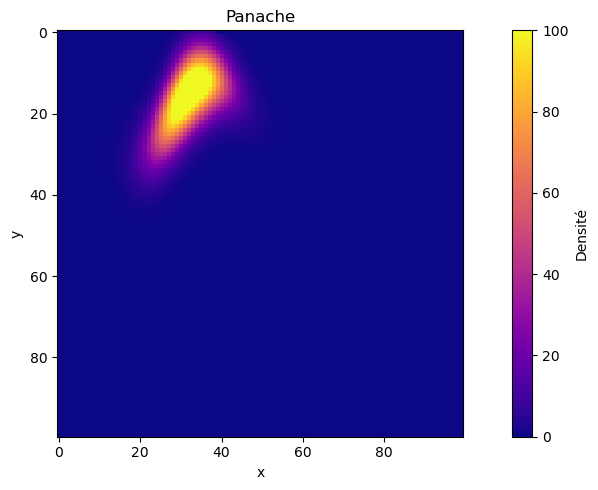

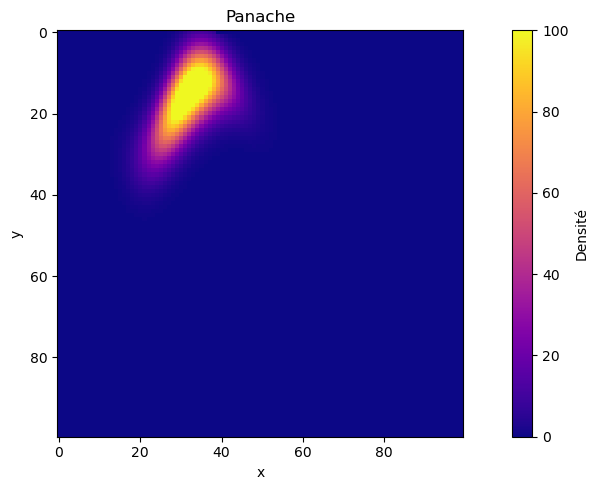

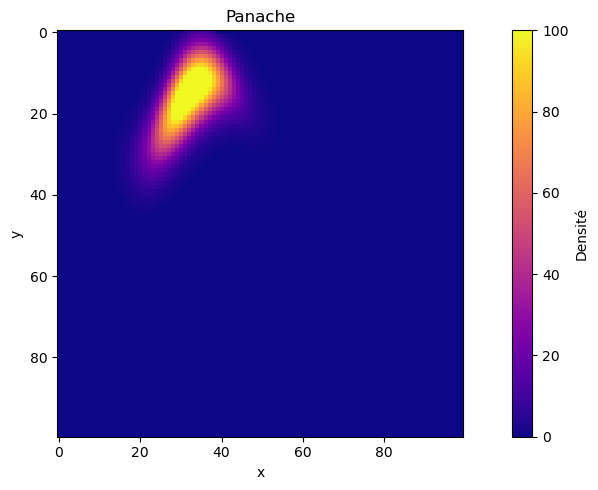

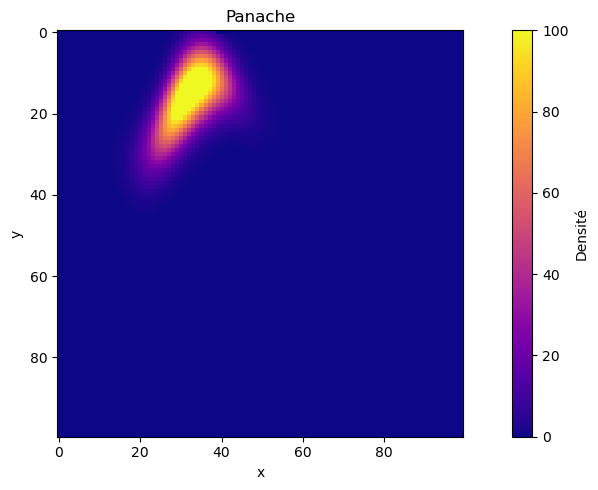

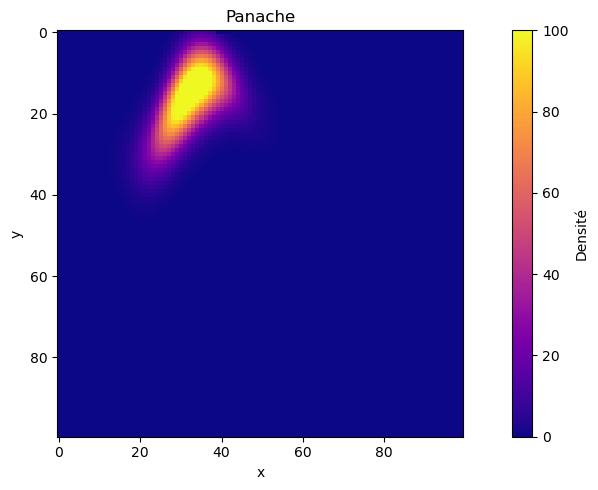

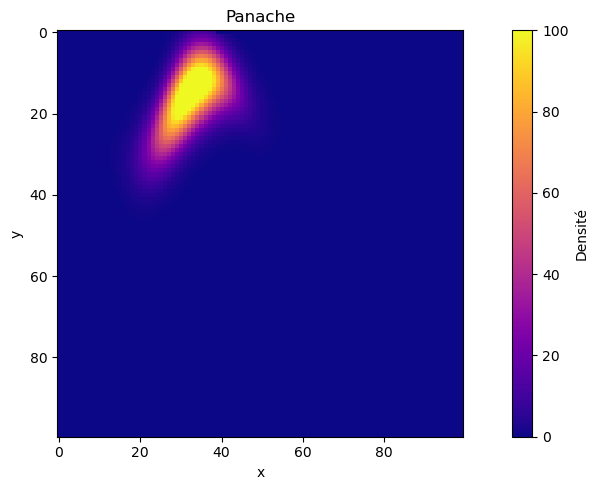

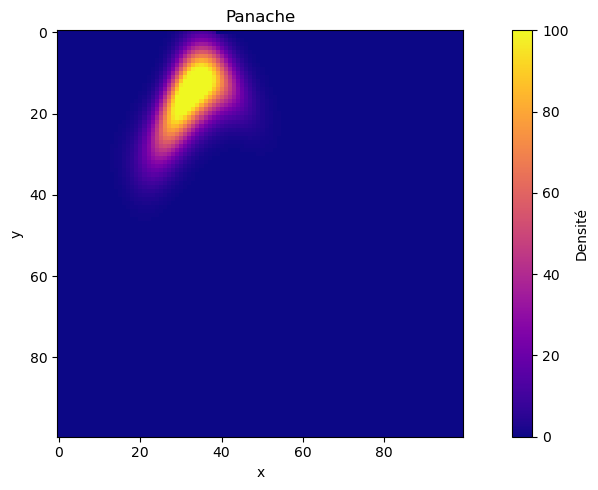

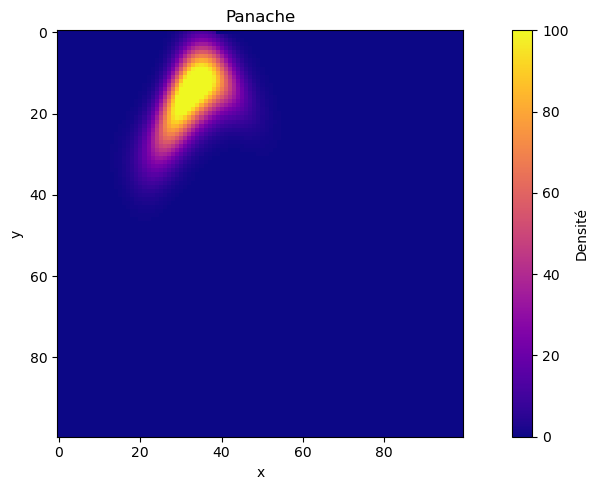

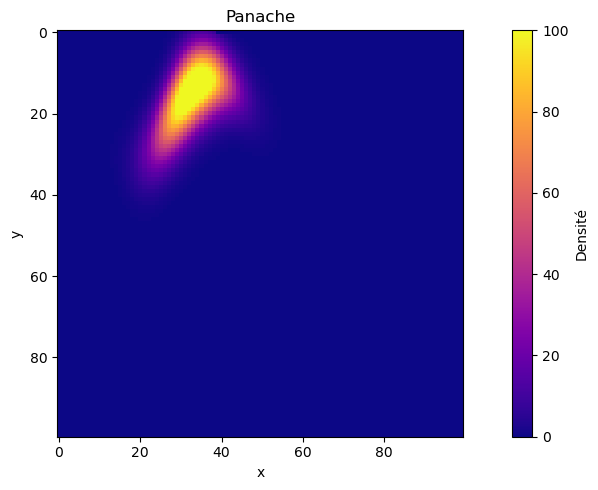

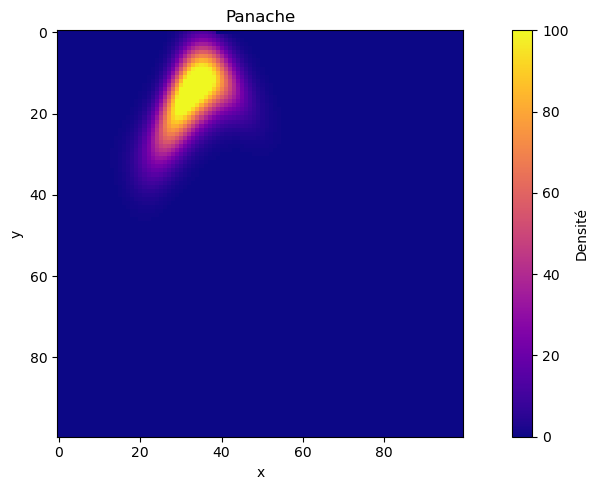

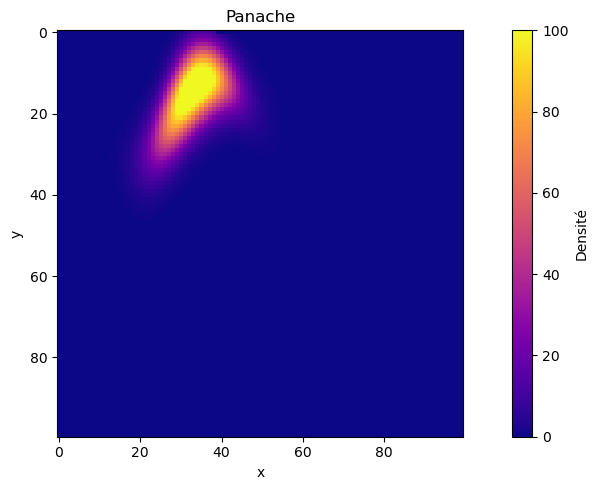

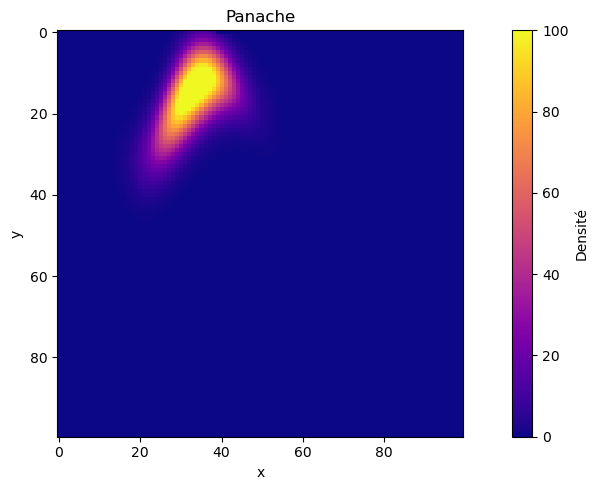

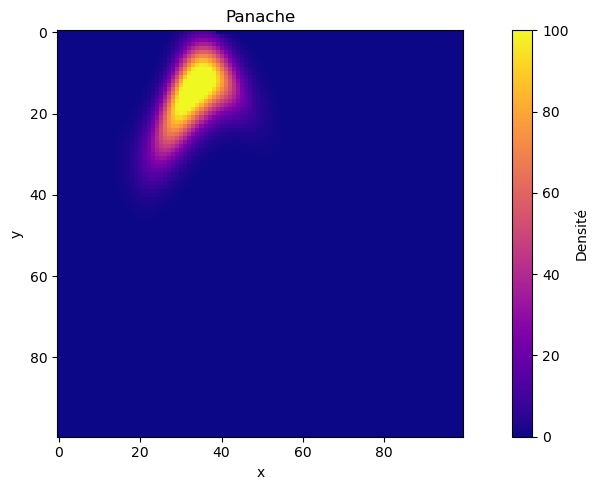

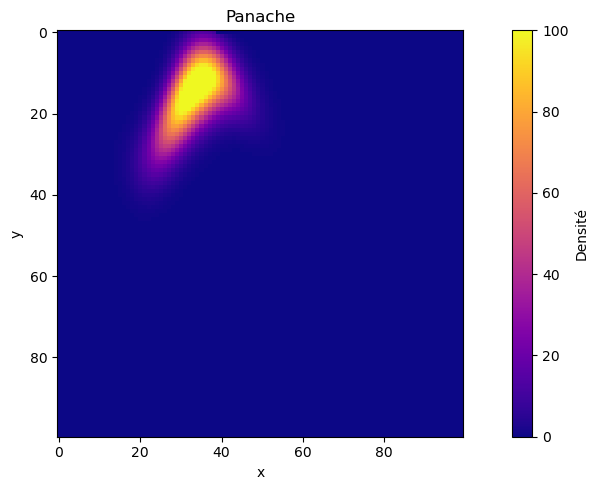

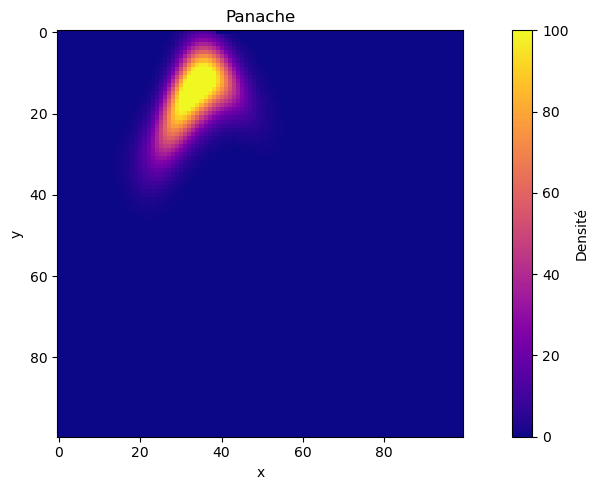

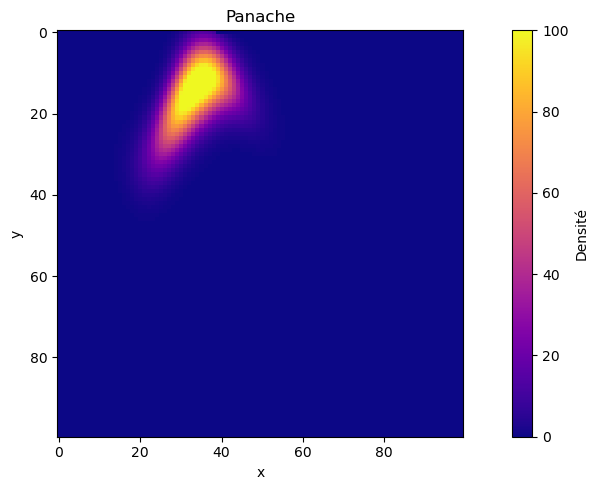

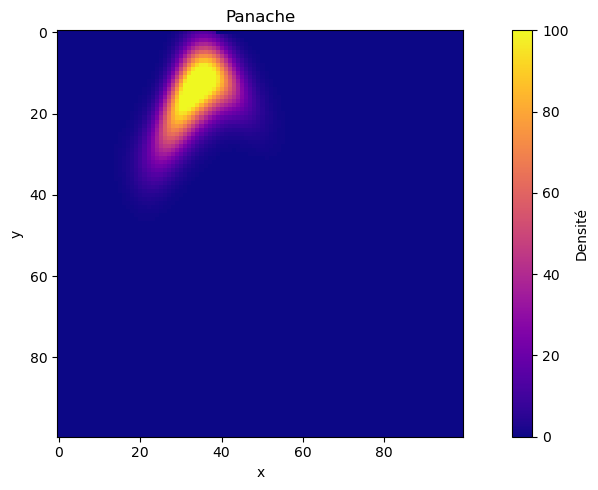

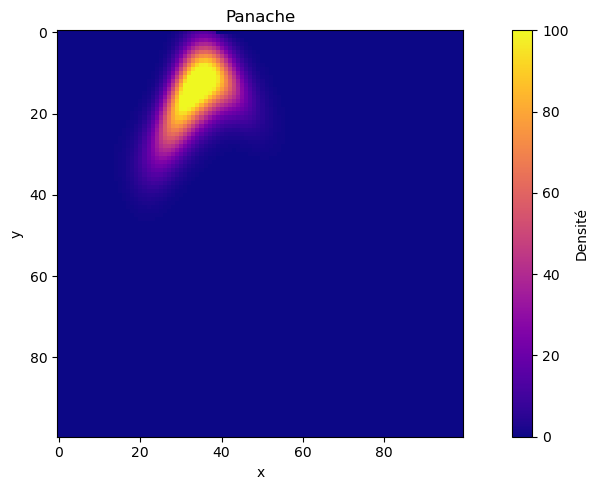

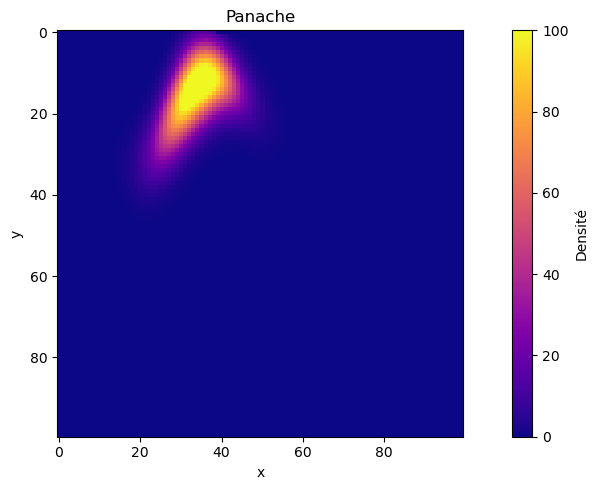

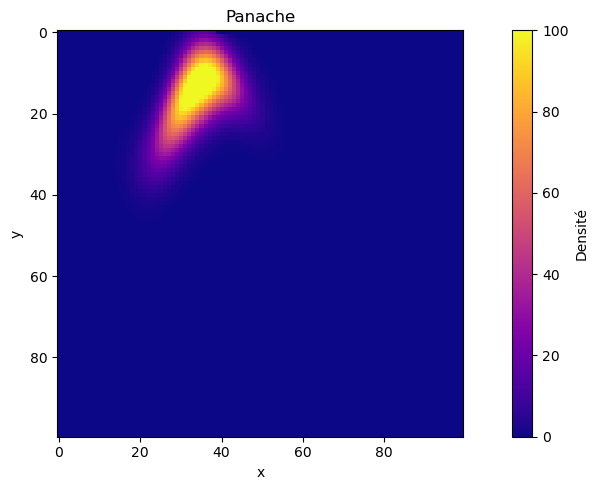

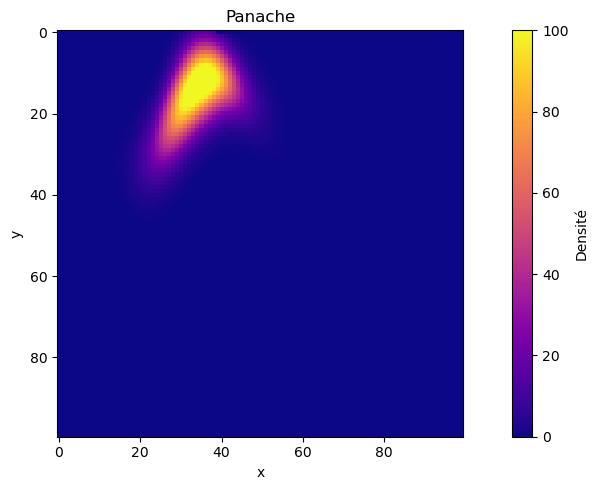

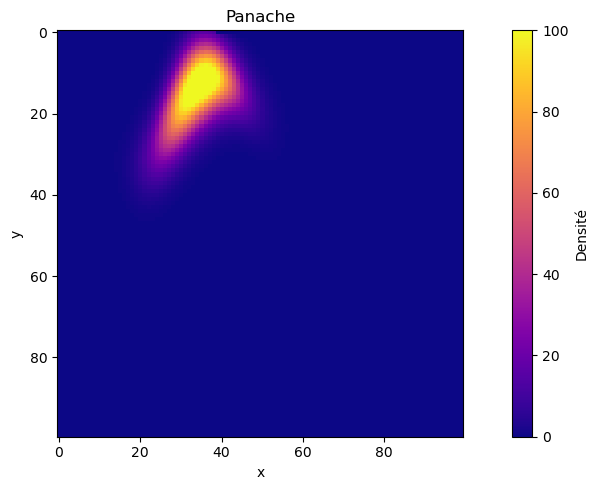

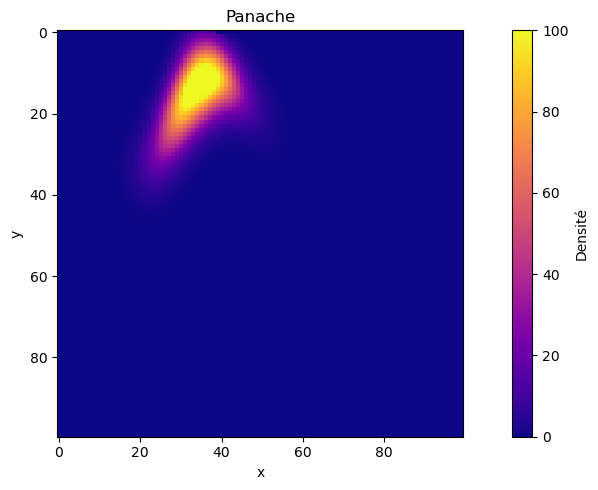

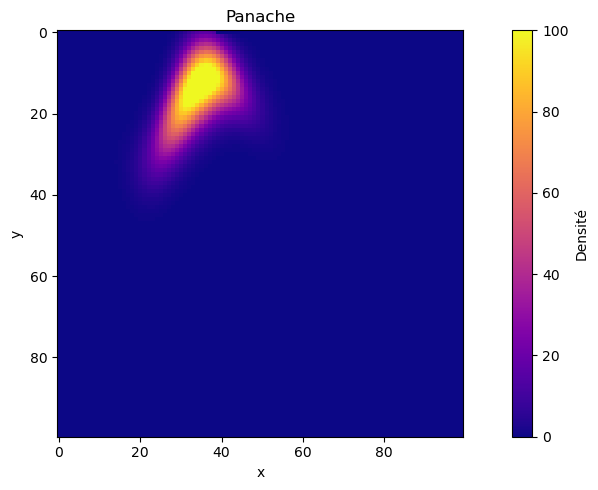

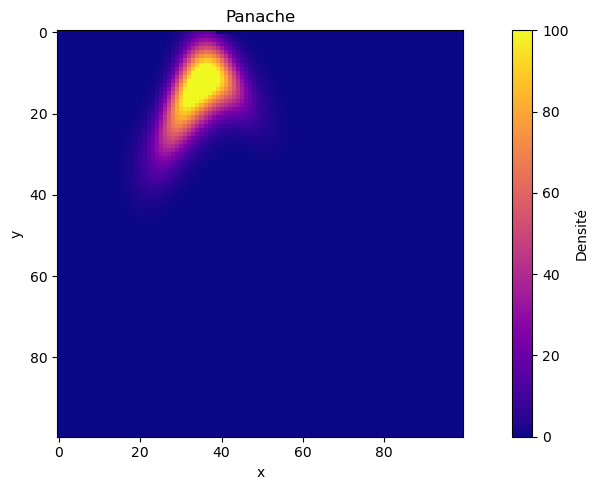

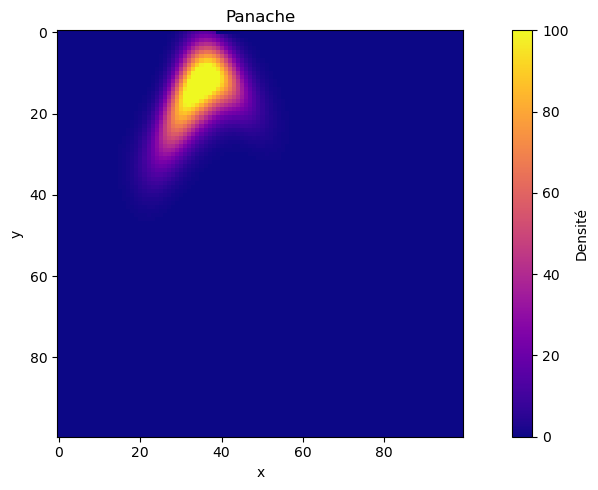

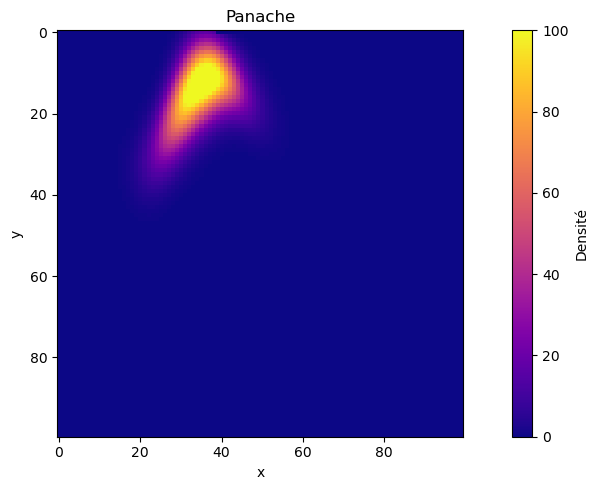

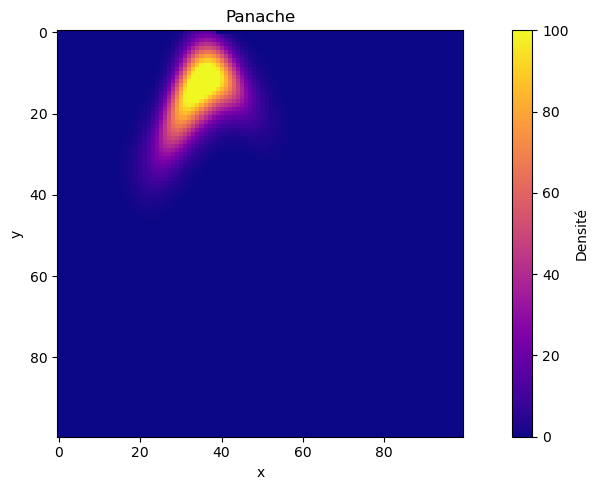

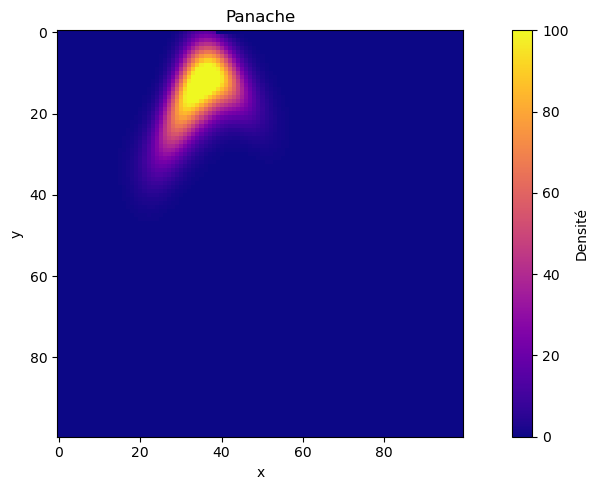

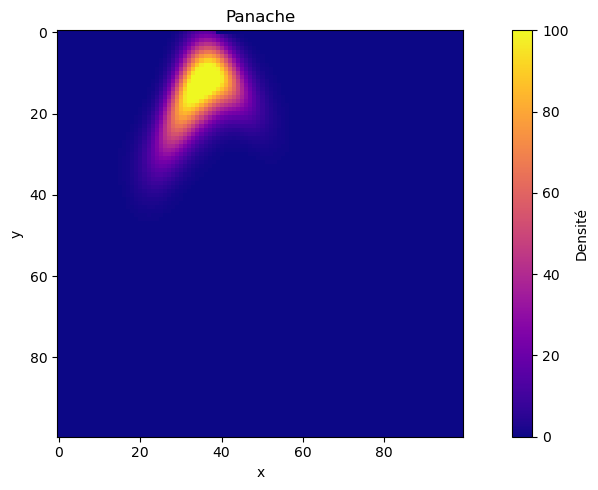

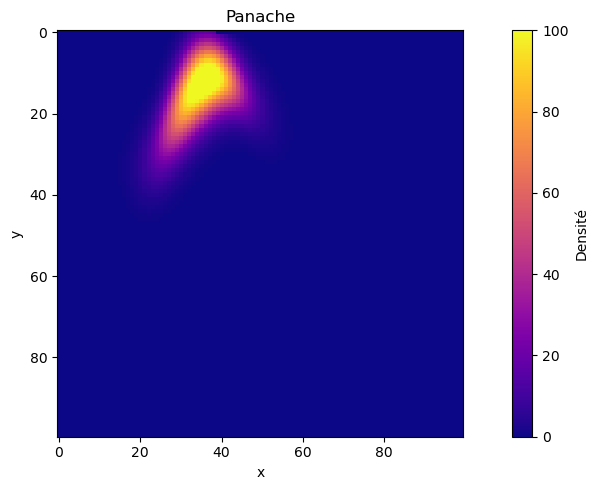

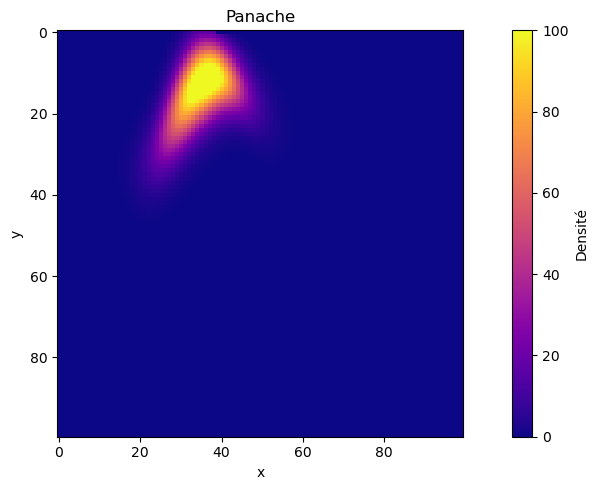

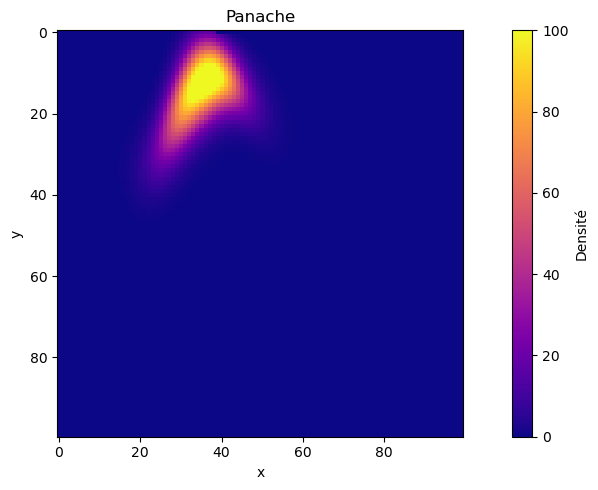

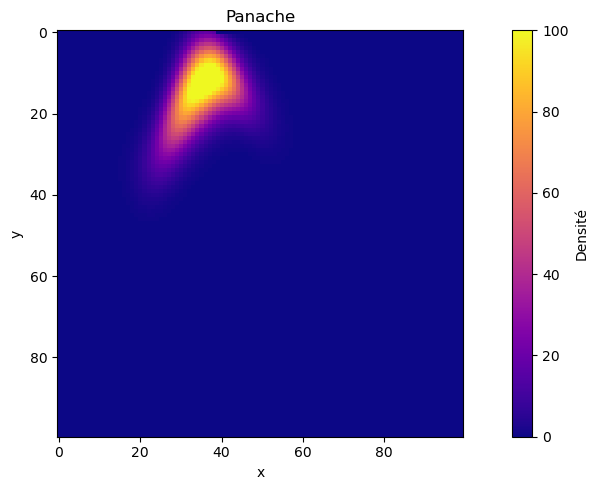

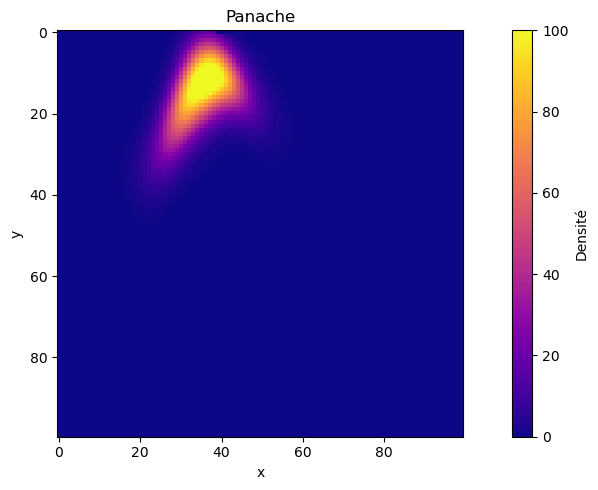

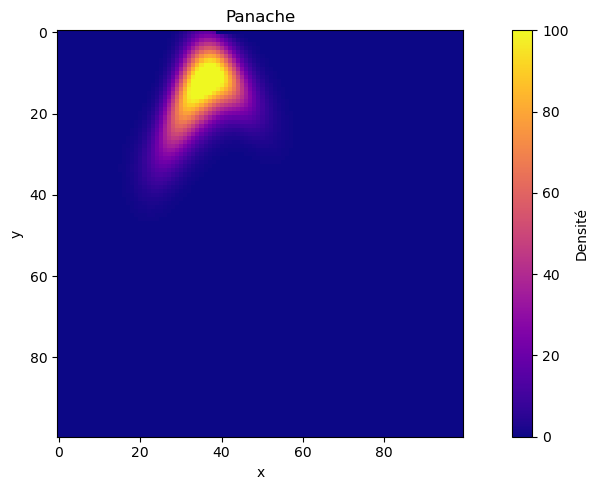

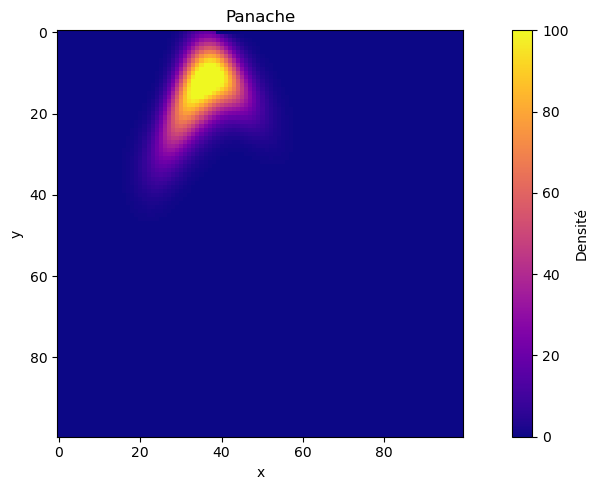

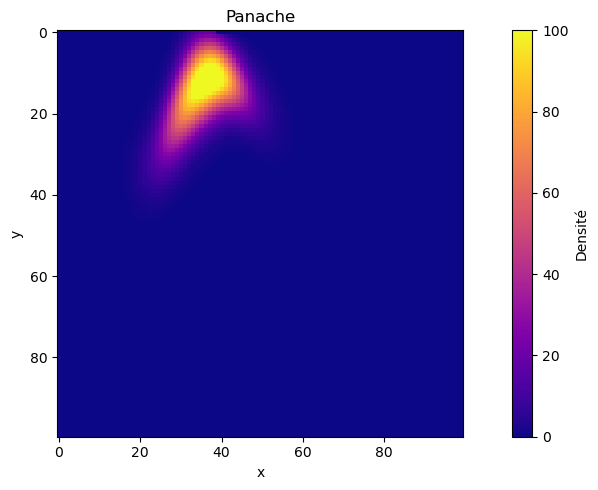

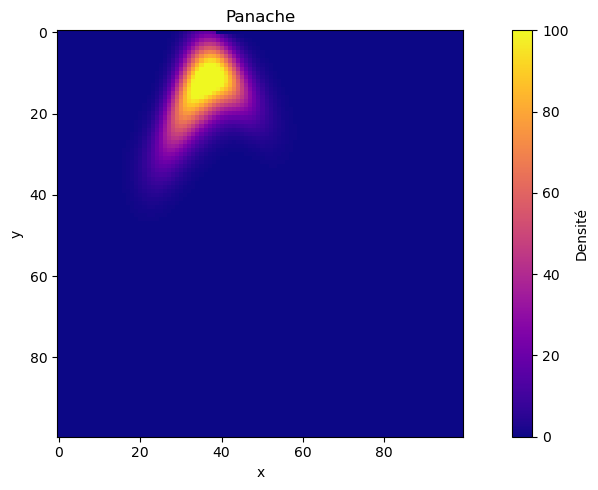

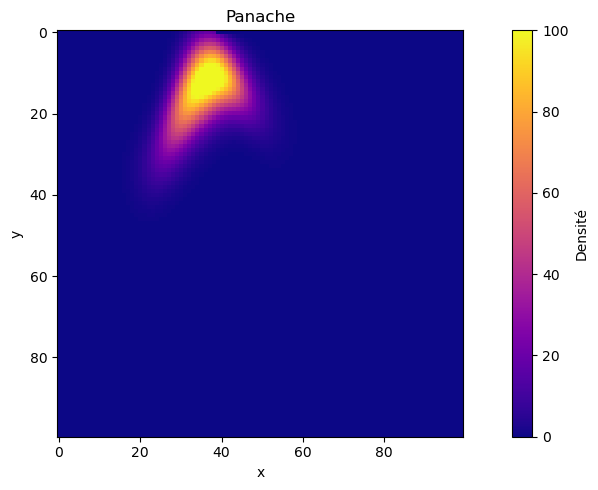

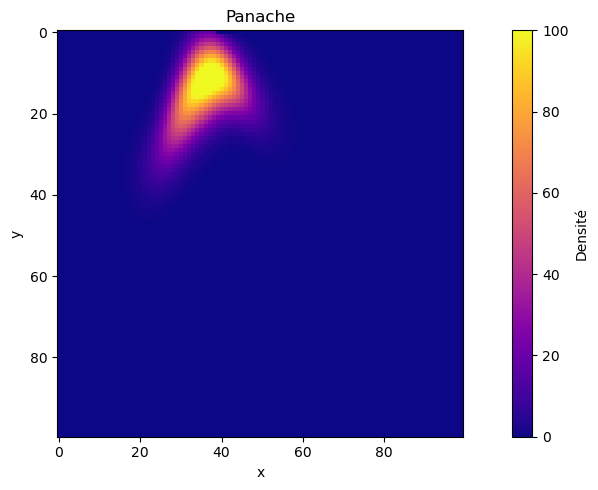

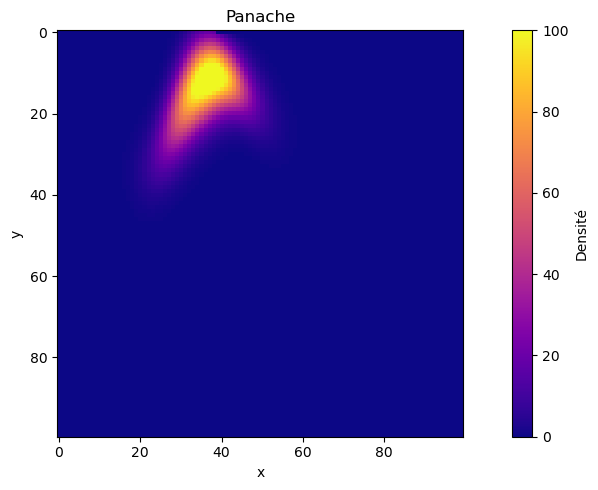

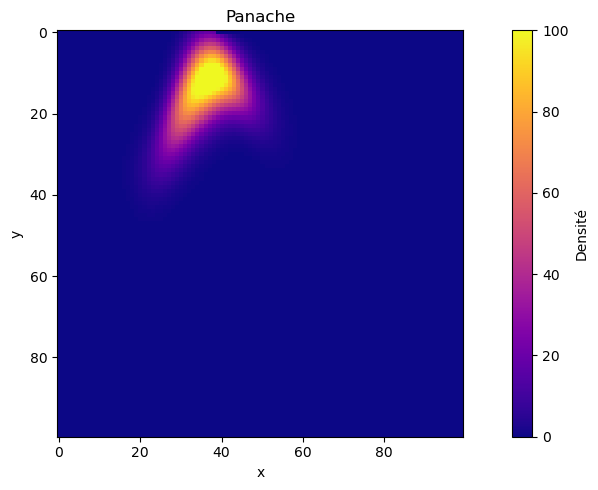

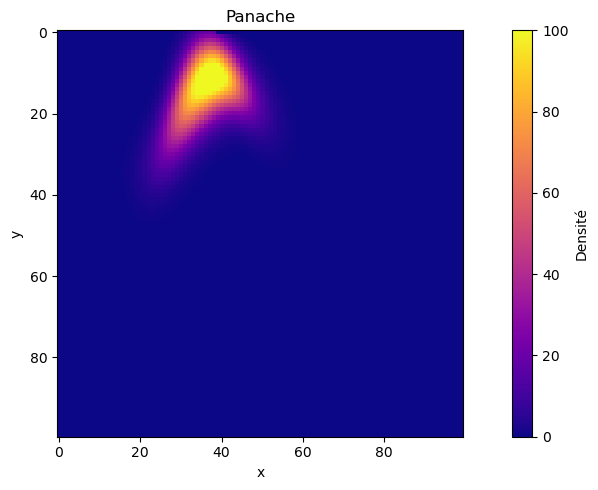

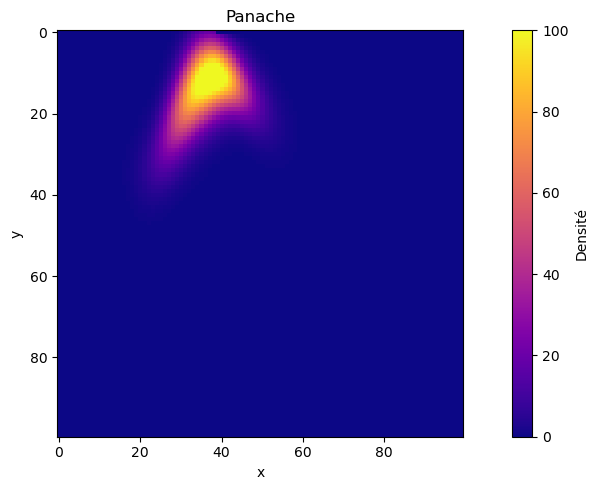

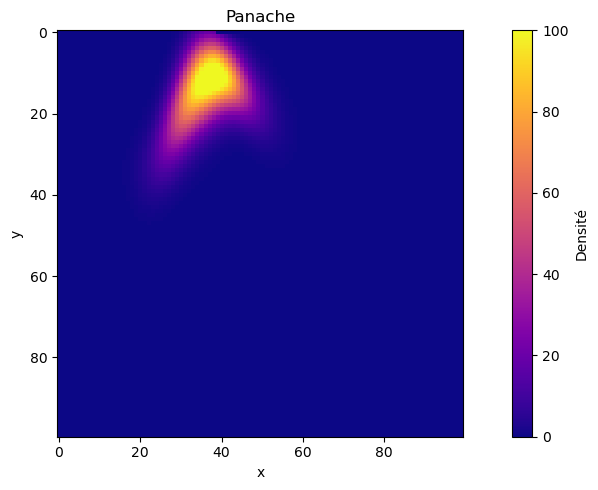

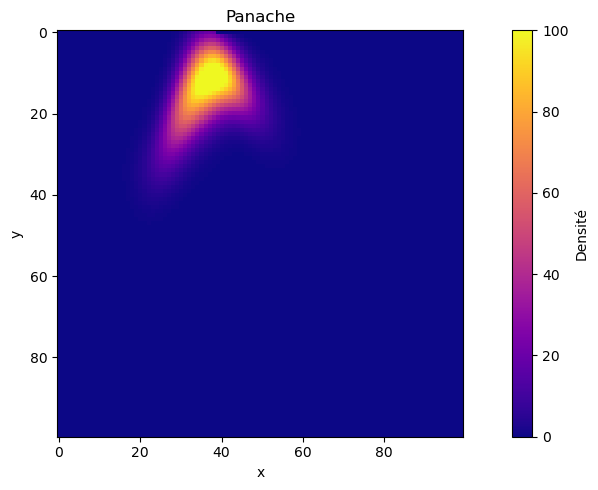

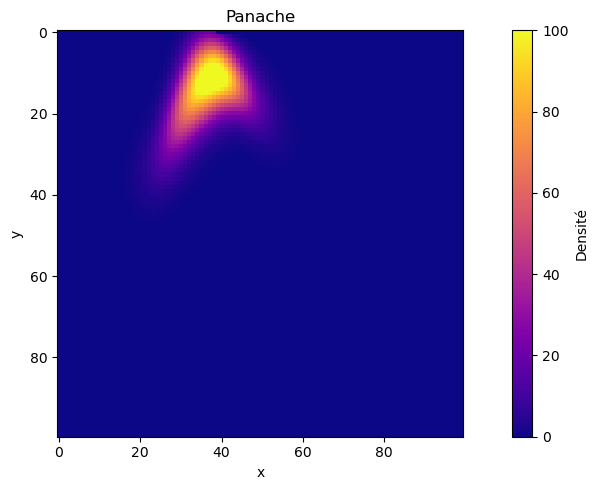

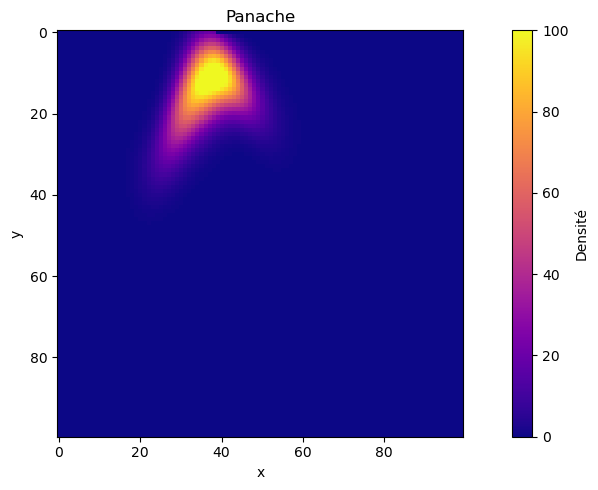

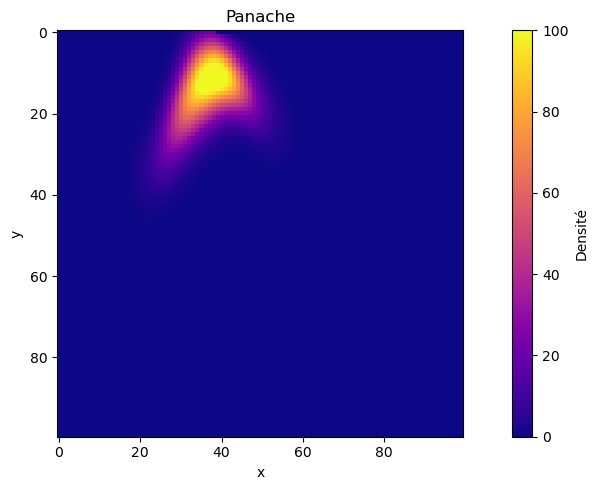

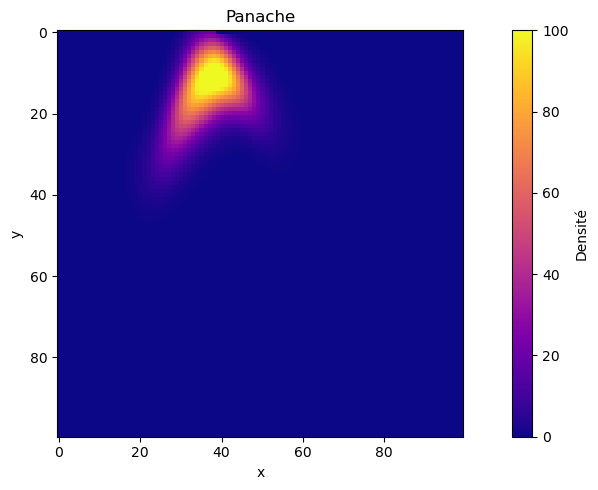

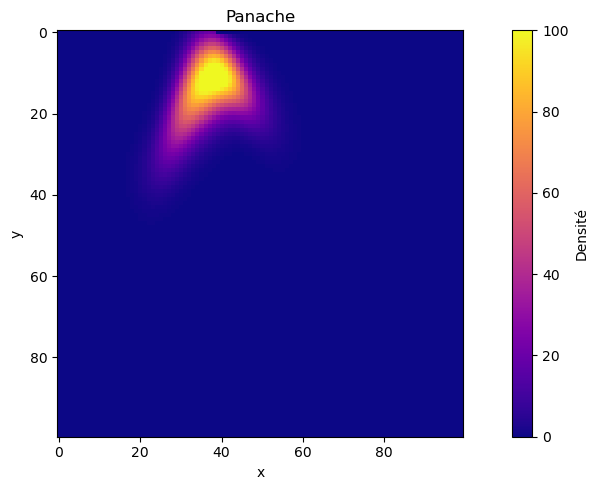

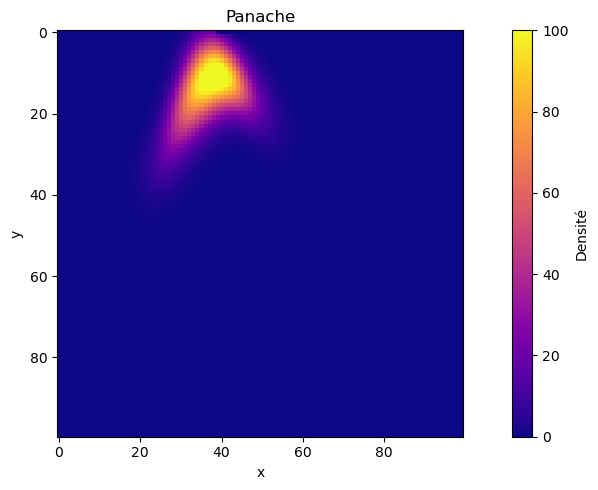

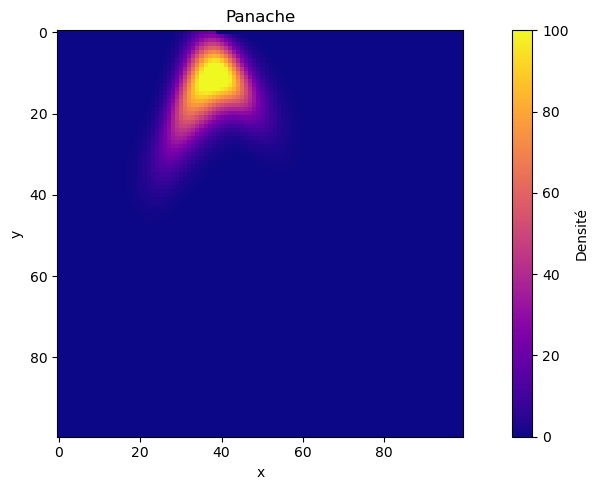

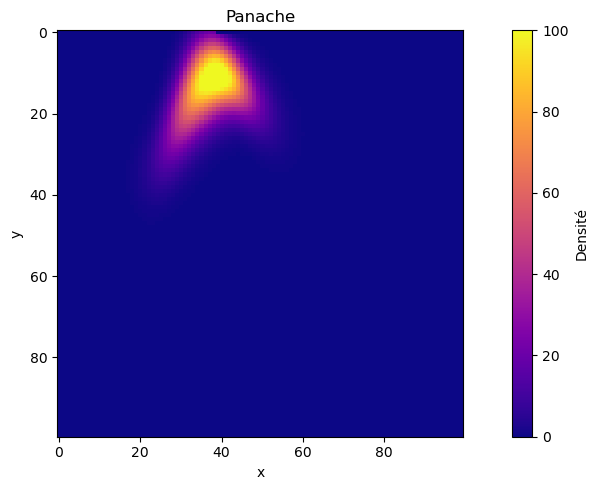

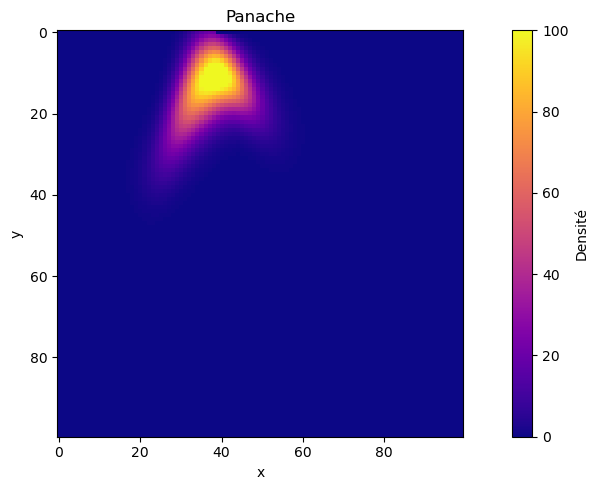

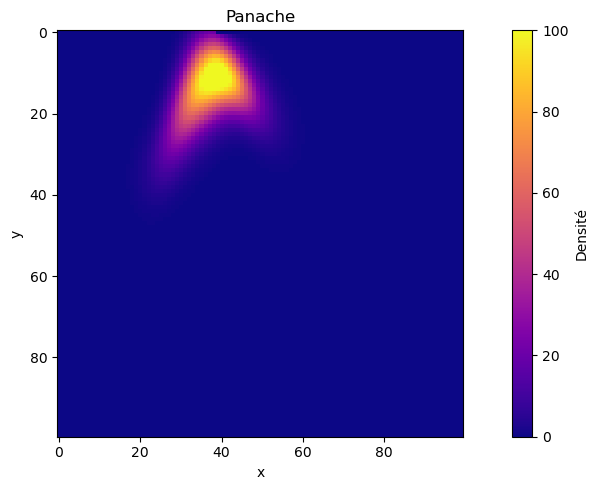

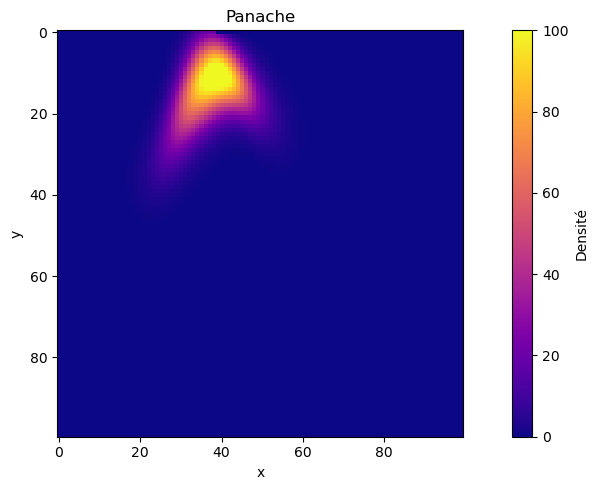

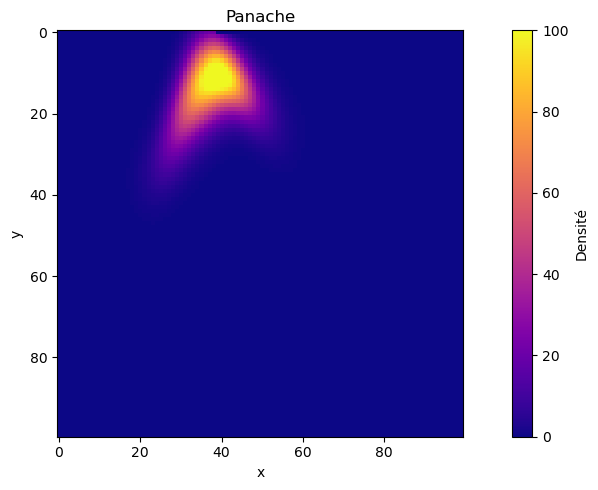

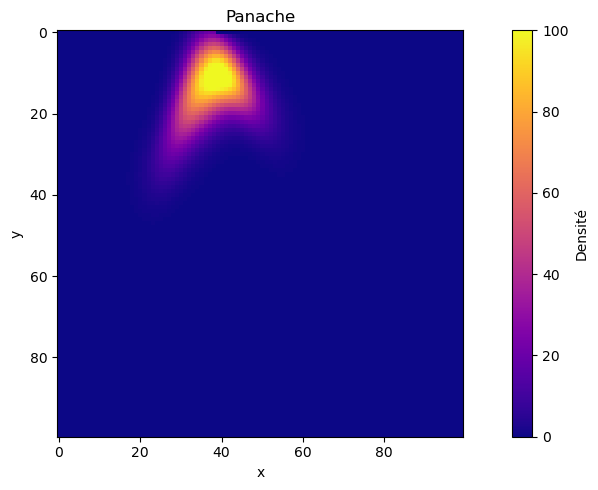

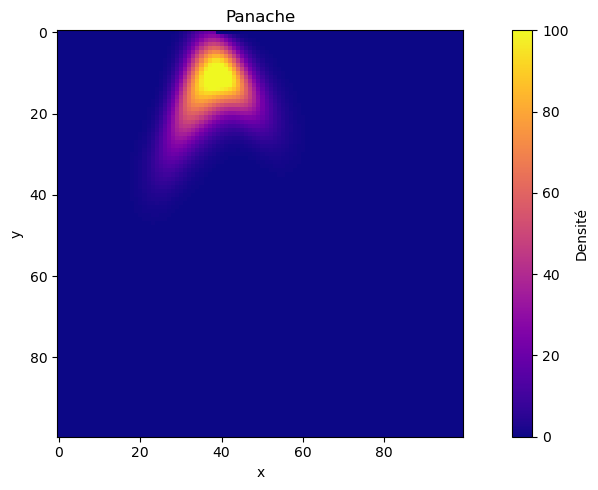

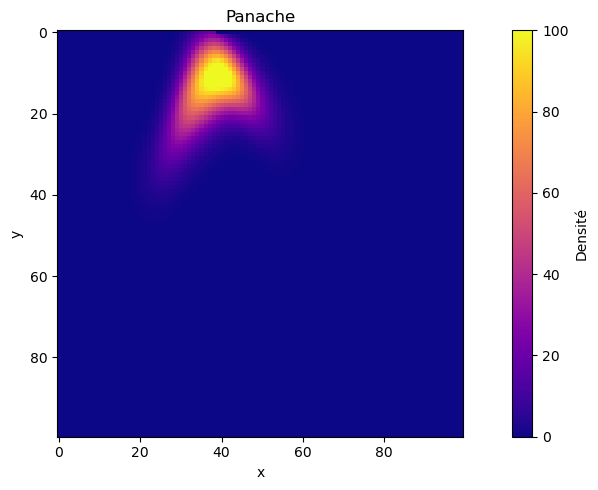

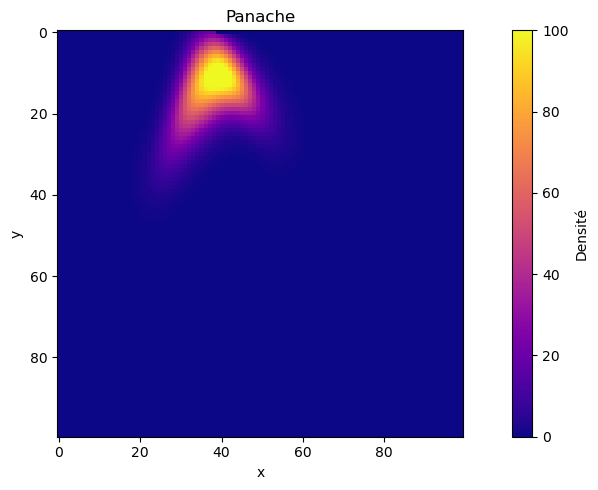

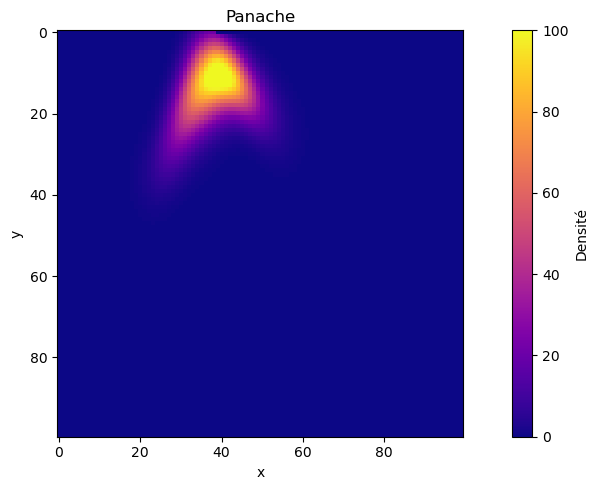

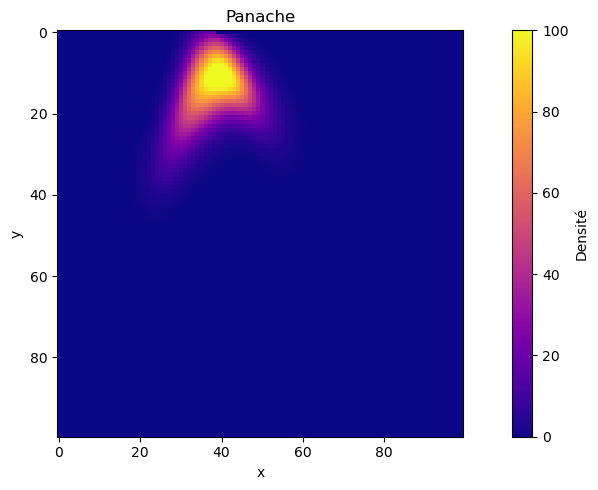

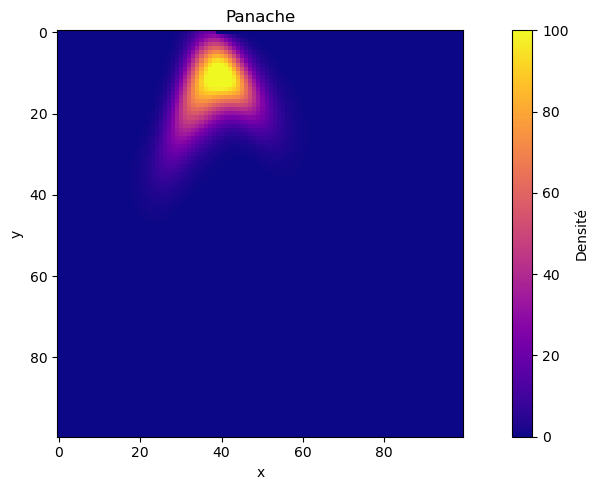

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import io
import os

#Utile si on veut créer un dossier pour mettre les images de panache
#directory = "animation_cheminé"
#parent_dir = "C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet"
#path = os.path.join(parent_dir, directory)
#os.mkdir(path)

#Inititalisation des valeurs
L = 50
H = 50
sigmax = L/20
sigmay = L/20
u0 = 10
q0 = 10                    #1/((np.pi *2)**(1/2) * sigmax) 
a = random.randint(1,9)
print(a)
b = random.randint(1,9) 
print(b)
x0 = 2*L/10
y0 = 2*H/10
x1 = 2*L/10
y1 = 7*H/10
dim = 200
nb_t = 200                 #Le nombre d'image que l'on veut afficher

#Definition des différentes fonctions
def u(x,t):
    return 100    #(1 + np.sin(16*x/5*dim - t/20))

def w(y,t):
    return 100*(0.4*np.sin(33*np.pi /dim - t/50) + np.sin(10*np.pi*(y/dim) - t/66))


def vitesse_max(u,dim):
    U = abs(u(0,0))
    for x in range(dim):
        for y in range(dim):
            if abs(u(x,y)) >= abs(U):
                U =  abs(u(x,y))
                #print(U)
    return U


def f(x,xs,y,ys,t):
    return  (q0**2)*np.exp(-(1/2)*((x-(xs+ u(x,y) * t))/sigmax)**2)*np.exp(-(1/2)*((y-(ys+ u(x,y) * t))/sigmay)**2)


def init_panache(dim,xs,ys):
    mat = np.zeros((dim,dim))
    for i in range (dim):
        for j in range (dim):
            mat[i][j] = f(L*j/dim,xs,L*i/dim,ys,0)
    return mat


def avancement(dim):
    pas_long = L/dim
    pas_temps = pas_long / ((10)*vitesse_max(u,dim))    #pas long / 2*u  A arranger n en fonction de w aussi
    print(vitesse_max(u,dim),pas_temps)
    panache_0 = init_panache(dim,x0,y0)
    #panache_01 = init_panache(dim,x1,y1)               #Cette ligne a commenter pour n'avoir qu'un seul panache
    panache = np.zeros((500,dim,dim))                   #les deux '#' à enlever pour les points sources
    panache[0] = panache_0 #+ panache_01                #Celle la avant le + pour n'avoir qu'un seul panache


    for t in range (1,nb_t):                             #Mettre un nombre de temps qu'on veut avoir en image
        for i in range (dim):
            for j in range (dim):
                ay = (w(j,i)*pas_temps/pas_long)
                ax = (u(j,i)*pas_temps/pas_long)
                #print(u(j),a)
                if ay > 0:
                    if i == 0:
                        panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j]
                    else:
                        panache[t][i][j] =  (-ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] + ay*panache[t-1][i-1][j]
                else:
                    if i == dim -1:
                        panache[t][i][j] =  (ay -ax + 1)*panache[t-1][i][j]
                    else:
                        panache[t][i][j] =  (ay -ax + 1)*panache[t-1][i][j] + ax * panache[t-1][i][j-1] - ay* panache[t-1][i+1][j]
                
                if t==20 or t==250:                                                   #Ligne à commenter si nous voulons enlever la ré-émission
                    panache[t][i][j] = panache[t][i][j] + panache_0[i][j]


    for i in range(0,nb_t):

            plt.rcParams["figure.figsize"] = [10, 5]
            plt.rcParams["figure.autolayout"] = True
            plt.imshow(panache[i], cmap="plasma")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.colorbar(label='Densité')
            plt.clim(0,100)            
            plt.title('Panache')
            plt.savefig(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_cheminé/panache_{i}.png', dpi=500)
            plt.show()
    
            #Première étape pour enregistrer les images dans un fichier :
            #mpimg.imsave(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation/panache_{i}.png',panache[i], cmap = plt.cm.gist_stern)
            #plt.close

avancement(100)

#Pour animer les différentes images de panaches qu'on a pu enregistrer dans le dossier animation
liste_fichier = []
liste_fichier = os.listdir("C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_cheminé")
#print(liste_fichier)
liste_panache = []
for i in range(0,nb_t):
    im = Image.open(f'C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/animation_cheminé/panache_{i}.png')
    new_im = im.resize((1000, 500))
    liste_panache.append(new_im)

#Création d'une liste d'image pour créer un gif que l'on va mettre dans un nouveau dossier 'gifs_animation'
liste_panache[0].save('C:/Users/mulle/Desktop/Cours Tristan/Semestre 5/Projet/gifs_animation/panache_réémission.gif', save_all = True, append_images = liste_panache[1:], optimize = False, duration = 50)